### CMSE 201 Final Project

   ## Wesley Castro                                                                                  
   ### 4/14/2024
   ### Section_005

### Instructions For Running The Notebook

The data mainly used in this project to create the dataset for crime is freely available at https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/explorer/crime/crime-trend. The files can be downloaded by selection Michigan as the state and using the Lansing & East Lansing police department crime statisitcs. The files should be downloaded in the same folder as this notebook and be renamed appropraitely.

# Crime Variance In Respect To Income

### Background and Motivation

Crime has a big impact on everyones lives in the surrounding environment and becomes a greater threat every year. Mental health continues to become a greater issue daily, in some cases resulting in a school shooting. Unfortunately many of my peers including myself have been affected by atrocities like this, after spending some time thinking of a topic to chose for this project I was motivated to analyze crime involving what kind of crime committed is prevalent within a city and if income is a key factor. The project used publicy available government data from the FBI's Crime Data Explorer website and the United States Census Bureau.
##### Question: How Does Crime Vary Across A City With Respect To Income?

### Methodology

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy.optimize import curve_fit

sns.set_context('notebook')

The following cells are a collective of the code used to create a dataframe containing the frequency of the type of crime committed over the years from 2012 to 2022. Using the dataframe we are able to see how the crimes committed are correlated to income using a seaborn heatmap displaying the correlation coefficents within the matrix.

In [2]:
def readfile(file):
    return pd.read_csv(file)

In [3]:
#Read in the crime and income data
EL_crime_data = readfile('Summary Crime Reported by the East Lansing Police Department 2012-2022_04-09-2024.csv')
L_crime_data = readfile('Summary Crime Reported by the Lansing Police Department 2012-2022_04-09-2024.csv')

EL_income_data = readfile('RPIPC29620.csv')

In [4]:
#Create a dataframe with the concatenated data
El_L_crime_dt = pd.concat([EL_crime_data,L_crime_data])
El_L_crime = El_L_crime_dt.T
El_L_crime.columns = El_L_crime.iloc[0]
El_L_crime = El_L_crime.iloc[1:]


In [5]:
#create a dataframe of the Lansing-East Lansing Income data
El_income_data = EL_income_data.drop(EL_income_data.index[0])
El_df = El_income_data.drop(["DATE"],axis=1)


In [6]:
#set indicies to eachother
El_df.index = El_L_crime.index
#concatenate the dataframes
Inc_crime_df = pd.concat([El_L_crime, El_df], axis=1)


# Convert all numbers to integers
Inc_crime_df[['ElReported', 'ElCleared', 'LReported', 'LCleared']] = Inc_crime_df[['ElReported', 'ElCleared', 'LReported', 'LCleared']].astype(int)



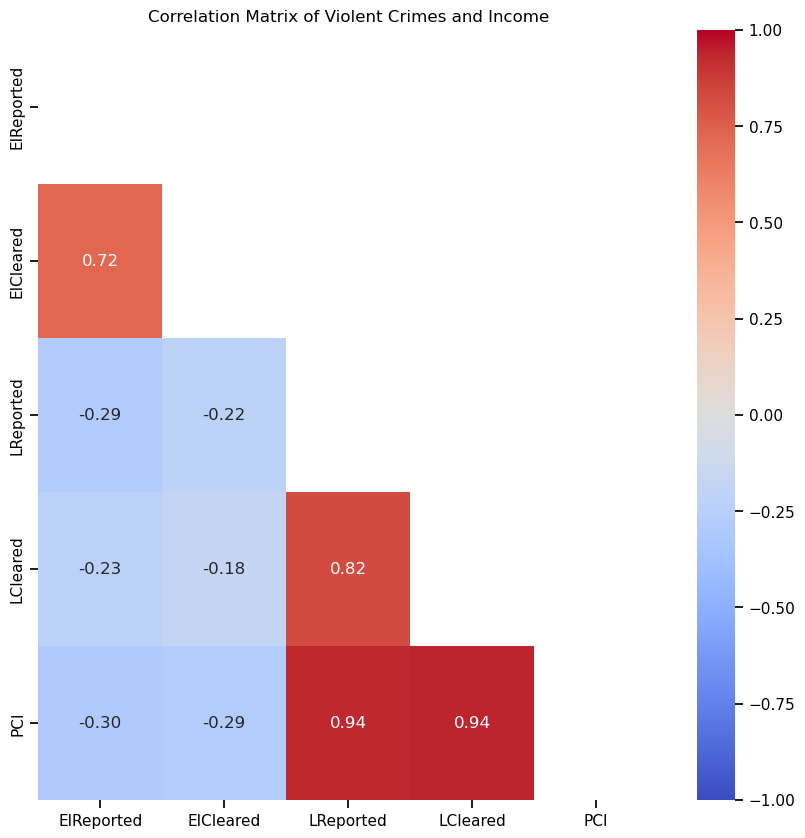

In [7]:
# Calculate the correlation matrix
corr_matrix = Inc_crime_df.corr(numeric_only = True)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, 
                         annot=True, # put the correlation coefficient in the plot
                         vmin = -1, vmax = 1, # set the limits equal for all the plots
                         fmt=".2f", # only 2 decimal digits
                         cmap='coolwarm', # color map
                         mask=mask # plot only the off-diagonal elements of the correlational matrix.
           )
plt.title('Correlation Matrix of Violent Crimes and Income')
plt.show()

In [8]:
#Read in files and transpose dataframe
el_property = readfile('All property crime El.csv')
l_property = readfile('All property crime L.csv')
propertycrime = pd.concat([el_property,l_property])
El_L_prop = propertycrime.T

In [9]:
#Clean data so proper accessing of data is possible
El_L_prop.columns = El_L_prop.iloc[0]

In [10]:
El_L_prop = El_L_prop.iloc[1:]

In [11]:
El_L_property = pd.concat([El_L_prop,El_df], axis=1)
#Make sure that all values in dataframe are uniform and integers so the model can properly calculate coefficients 
El_L_property[['ElReported', 'ElCleared', 'LReported', 'LCleared', 'PCI']] = El_L_property[['ElReported', 'ElCleared', 'LReported', 'LCleared', 'PCI']].astype(int)

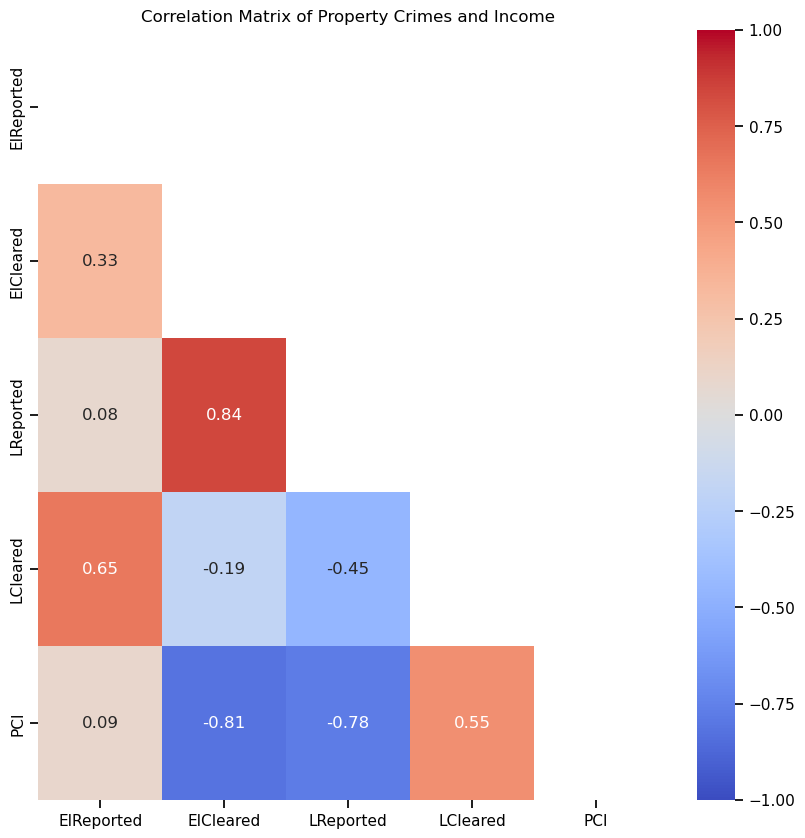

In [12]:
#Create a correlation matrix
prop_corr_matrix = El_L_property.corr(numeric_only = True)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(prop_corr_matrix, dtype=bool))

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(prop_corr_matrix, 
                         annot=True, # put the correlation coefficient in the plot
                         vmin = -1, vmax = 1, # set the limits equal for all the plots
                         fmt=".2f", # only 2 decimal digits
                         cmap='coolwarm', # color map
                         mask=mask # plot only the off-diagonal elements of the correlational matrix.
           )
plt.title('Correlation Matrix of Property Crimes and Income')
plt.show()

In [13]:
#Clean data from earlier to drop income variable 
violent_crime = Inc_crime_df.drop(["PCI"],axis=1)
property_crime = El_L_property.drop(["PCI"],axis=1)
#Create a dataframe with the total crime from both categories violent crime and property crime
property_and_violent_crime = violent_crime + property_crime

In [14]:
#Create a dataframe with the total crime and per capita income
total_crime_income = pd.concat([property_and_violent_crime,El_df], axis = 1)


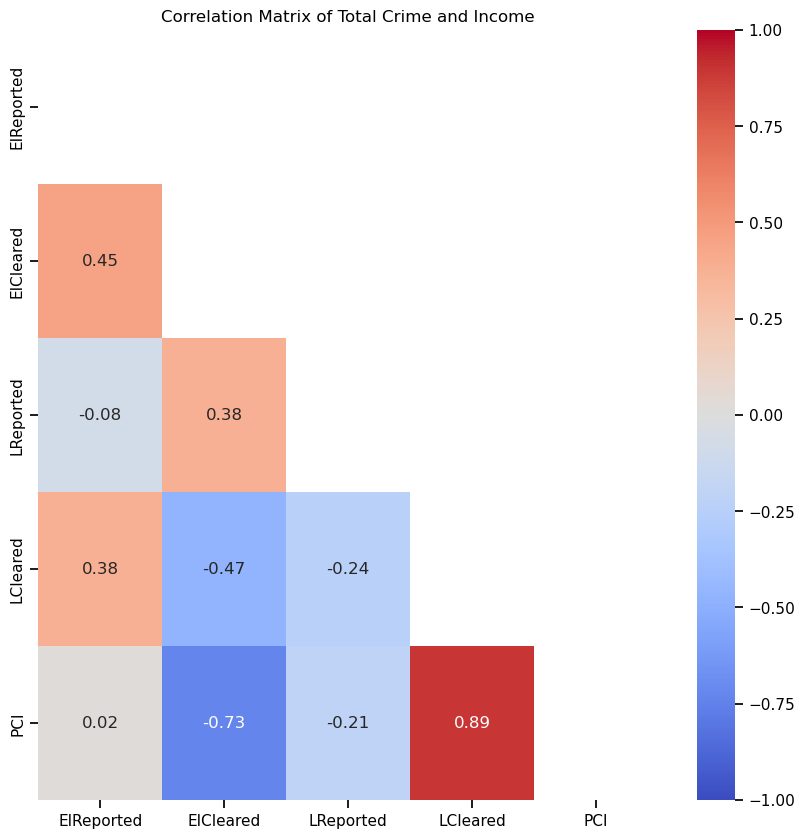

In [15]:
corr_matrix_fin = total_crime_income.corr(numeric_only = True)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix_fin, dtype=bool))

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_fin, 
                         annot=True, # put the correlation coefficient in the plot
                         vmin = -1, vmax = 1, # set the limits equal for all the plots
                         fmt=".2f", # only 2 decimal digits
                         cmap='coolwarm', # color map
                         mask=mask # plot only the off-diagonal elements of the correlational matrix.
           )
plt.title('Correlation Matrix of Total Crime and Income')
plt.show()

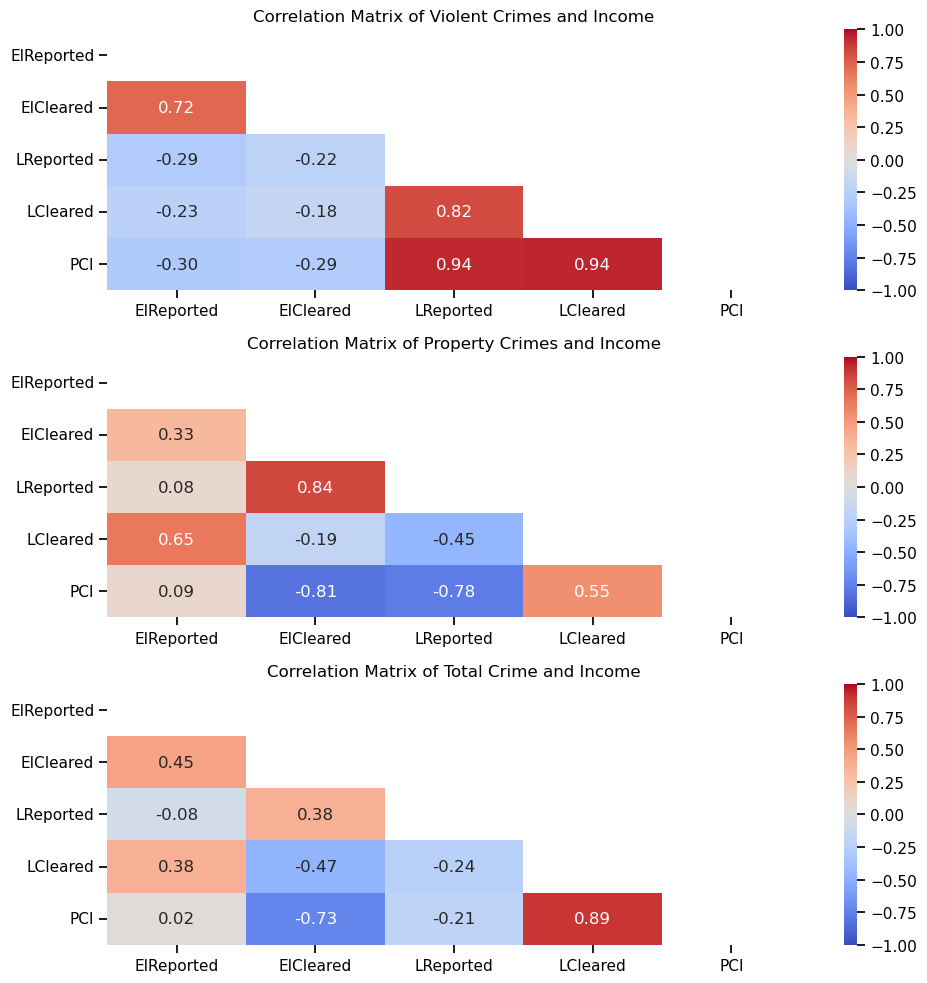

In [16]:
fig, axs = plt.subplots(3, figsize=(10, 10))

# Assuming you have 3 correlation matrices: corr_matrix_fin1, corr_matrix_fin2, corr_matrix_fin3
corr_matrices = [Inc_crime_df.corr(numeric_only = True), 
                 El_L_property.corr(numeric_only = True), 
                 total_crime_income.corr(numeric_only = True)]
titles = ['Correlation Matrix of Violent Crimes and Income', 
          'Correlation Matrix of Property Crimes and Income', 
          'Correlation Matrix of Total Crime and Income']

for ax, corr_matrix_fin, title in zip(axs, corr_matrices, titles):
    # Create a mask to hide the upper triangle
    mask = np.triu(np.ones_like(corr_matrix_fin, dtype=bool))

    # Plotting the correlation matrix using seaborn
    sns.heatmap(corr_matrix_fin, 
                annot=True, # put the correlation coefficient in the plot
                vmin = -1, vmax = 1, # set the limits equal for all the plots
                fmt=".2f", # only 2 decimal digits
                cmap='coolwarm', # color map
                mask=mask, # plot only the off-diagonal elements of the correlational matrix.
                ax=ax # this is the axes where this plot will be drawn
               )
    ax.set_title(title)

plt.tight_layout()
plt.show()

Creating seperate correlation matrices for crime categories in their own respective subplot indentifies the areas of crime correlated to income within Lansing and East Lansing. Analysing the correlation coefficents within the seaborn heatmap highlights the correlated values making the data easy to view. The violent crime matrix shows a strong correlation between Lansing crime and income while the East Lansing crime does not seem to be correlated with income. The property crime matrix seems to have a negative correlation which also shows an inverse relationship so as income rises the property crime seems to decrease. The total crime matrix seems to be very scattered and does not show much for correlation as this shows that when analysing data it is important to break down the data as much as possible until it can not be done anymore instead of viewing data that is grouped together.

In [17]:
#Read in all data on crimes 
El_homici = readfile('East lansing homicide.csv')
El_rape = readfile('East lansing rape.csv')
El_robbery = readfile('East lansing robbery.csv')
El_aggrv_asslt = readfile('East lansing agrv. asslt..csv')
El_arson = readfile('East lansing arson.csv')
El_burglary = readfile('East lansing burglary.csv')
El_larceny_theft = readfile('East lansing larceny-theft.csv')
El_mv_theft = readfile('East lansing motor vehic theft.csv')

L_homici = readfile('Homicide summary lansing.csv')
L_rape = readfile('Lansing rape.csv')
L_robbery = readfile('Lansing Robbery.csv')
L_aggrv_asslt = readfile('Lansing Aggrav. Asslt..csv')
L_arson = readfile('Lansing arson.csv')
L_burglary = readfile('Lansing Burgulary.csv')
L_larceny_theft = readfile('Lansing Larceny-theft.csv')
L_mv_theft = readfile('Lansing motor-veh. theft.csv')

In [18]:
#Create dataframes of crimes commited in their respective neighborhoods
El_rape = El_rape.fillna(0)  #adjust data set so dataframe is uniform
El_data = [El_homici,El_rape,El_robbery,El_aggrv_asslt,El_arson,El_burglary,El_larceny_theft,El_mv_theft]#El_L_crime_df = pd.concat([EL_crime_data,L_crime_data])
L_data = [L_homici,L_rape,L_robbery,L_aggrv_asslt,L_arson,L_burglary,L_larceny_theft,L_mv_theft]

EL_data = pd.concat(El_data)
El_crime_df = EL_data.T

In [19]:
El_crime_df.columns = El_crime_df.iloc[0]

In [20]:
El_crime_df = El_crime_df.iloc[1:]

In [21]:
El_crime_df

series,El Homicide Reported,El Homicide Cleared,El Rape Reported,El Rape Cleared,El Robbery Reported,El Robbery Cleared,El Agrv. Asslt. Reported,El Agrv. Asslt. Cleared,El Arson Reported,El Arson Cleared,El Burglary Reported,El Burglary Cleared,El l-theft Reported,El l-theft Cleared,El MV Theft Reported,El MV TheftCleared
2012,0,0,20,0,19,5,81,26,60,1,222,14,703,47,84,4
2013,1,0,34,3,24,6,54,13,98,0,150,16,553,34,95,5
2014,2,2,29,1,27,4,80,31,49,0,147,7,491,34,63,1
2015,1,0,40,1,14,0,43,11,67,1,163,9,485,26,88,2
2016,0,0,44,1,24,3,48,8,11,2,124,7,489,16,108,5
2017,0,0,23,3,16,0,44,12,21,0,106,8,540,25,137,6
2018,1,0,35,1,13,2,59,16,6,0,91,1,537,20,180,7
2019,0,0,42,1,11,2,35,7,24,1,113,8,564,19,164,6
2020,0,0,21,7,13,0,42,10,14,1,86,3,568,21,163,3
2021,1,0,21,1,12,1,85,23,29,0,85,1,564,11,209,9


In [22]:
#Create a growth rate function
def growth_rate(init_pop,fin_pop):
    growth = (init_pop - fin_pop) / init_pop
    return growth

In [23]:
# Given data from census bureau
Elpopulation_2022 = 47340
Elpopulation_2020 = 47741

El_2y_gr = growth_rate(Elpopulation_2020,Elpopulation_2022)

In [24]:
#Create a function to calculate population
def calculate_population(year, population, growth_rate):
    return population * math.exp(growth_rate * (year - 2022))

In [25]:
Elpopulation = []
for year in range(2012, 2023):
    population = calculate_population(year, Elpopulation_2022, -El_2y_gr)
    Elpopulation.append((year, round(population)))
Elpopulation_df = pd.DataFrame(Elpopulation, columns=['series', 'Population'])

In [26]:
Elpopulation_df.set_index('series', inplace=True)

In [27]:
#Create a copy of dataframe so original data is not altered
El_crime_df_copy = El_crime_df.copy()

In [28]:
El_crime_df_copy.index = El_crime_df_copy.index.astype('int64')

In [61]:
#Create a function to calculate crime rates
def crimepercapita(crime_df,population):
    assert (crime_df.index == population.index).all(), "Indices of dataframes do not match"
    crime_rate_df = pd.DataFrame(index=crime_df.index)
    for column in crime_df.columns:
        if 'Reported' in column:
            crime_rate_df[column] = (crime_df[column] / population['Population']) *100000
    return crime_rate_df

In [30]:
El_crime_rates = crimepercapita(El_crime_df_copy, Elpopulation_df)

In [31]:

El_df.index = El_crime_rates.index

El_cr_i = pd.concat([El_crime_rates, El_df], axis=1)

In [32]:

El_cr_i

,El Homicide Reported,El Rape Reported,El Robbery Reported,El Agrv. Asslt. Reported,El Arson Reported,El Burglary Reported,El l-theft Reported,El MV Theft Reported,PCI
2012,0.0,38.844002,36.901802,157.31821,116.532007,431.168428,1365.366687,163.14481,38537
2013,1.958595,66.59224,47.006287,105.764146,191.942339,293.789294,1083.103198,186.066553,38044
2014,3.950227,57.278294,53.328066,158.009086,96.780565,290.341695,969.780762,124.432155,39048
2015,1.991754,79.670166,27.884558,85.645428,133.447527,324.655924,966.000757,175.274364,41665
2016,0.0,88.376484,48.205355,96.41071,22.094121,249.061,982.184104,216.924097,41994
2017,0.0,46.586996,32.408345,89.122949,42.535953,214.705287,1093.781649,277.496455,42829
2018,2.042567,71.489848,26.553372,120.511459,12.255403,185.873606,1096.858532,367.662078,43132
2019,0.0,86.512318,22.657988,72.093598,49.43561,232.759331,1161.736838,337.810002,43815
2020,0.0,43.620955,27.003448,87.241909,29.080636,178.638195,1179.842965,338.581696,48273
2021,2.094723,43.989191,25.136681,178.051488,60.746978,178.051488,1181.423993,437.797189,50559


In [33]:
#Create a linear equation function
def linear_eq(x, a, b):
    y = a + b * x
    return y

In [34]:
#Create a cubic equation function
def cubic_eq(x, a, b, c, d):
    y = 0
    coeff = [a, b, c, d]
    for i in range(len(coeff)):
        # Iterate through the coefficients and calculate the corresponding term
        y += coeff[i] * x ** i

    return y

In [35]:
#Create a square root equation function
def sqrt_eq(x, a, b):
    y = a + b * np.sqrt(x)
    return y

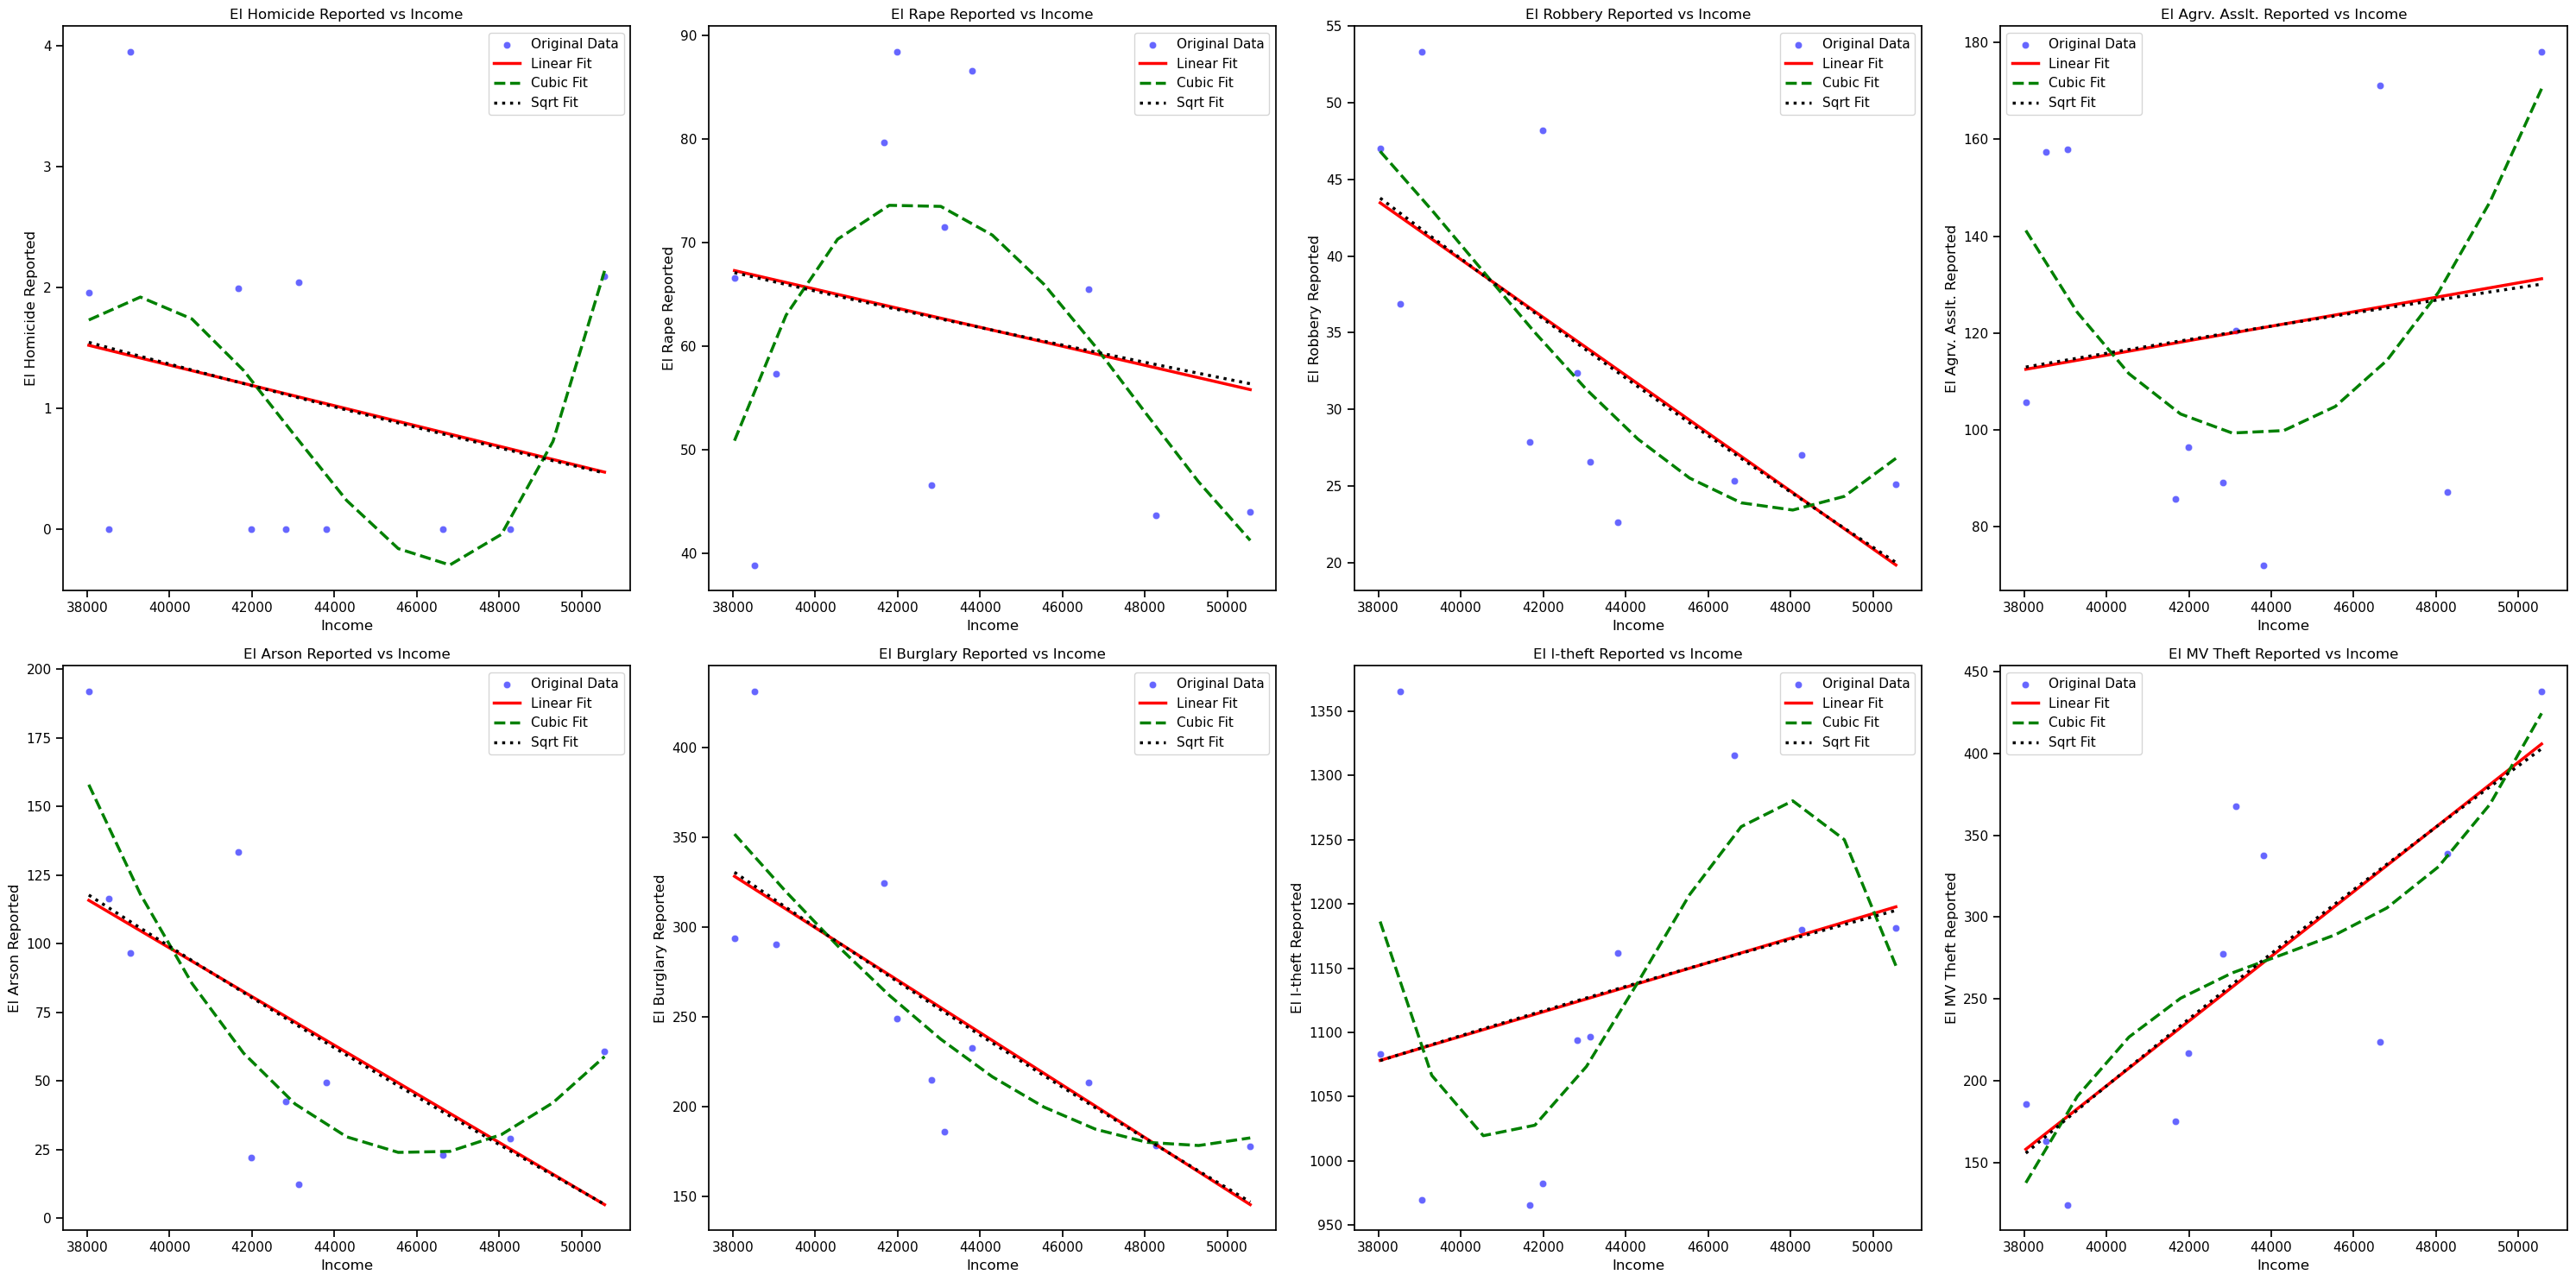

In [36]:
#Create scatter plots with best fit curves
fig, axs = plt.subplots(2, 4, figsize=(30, 15))  # Adjust as needed

# Flatten the axes array
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(El_cr_i.columns)-1:]:
    fig.delaxes(ax)

for ax, crime in zip(axs, El_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = El_cr_i['PCI'].values
        ydata = El_cr_i[crime].values

        # Fit the models
        linear_params, _ = curve_fit(linear_eq, xdata, ydata)
        cubic_params, _ = curve_fit(cubic_eq, xdata, ydata)
        sqrt_params, _ = curve_fit(sqrt_eq, xdata, ydata)

        # Sort the x values for predictions by creating a new range
        x_fit = np.linspace(xdata.min(), xdata.max(), len(xdata))

        # Calculate fitted y values
        y_linear_fit = linear_eq(x_fit, *linear_params)
        y_cubic_fit = cubic_eq(x_fit, *cubic_params)
        y_sqrt_fit = sqrt_eq(x_fit, *sqrt_params)

        # Plotting
        sns.scatterplot(x=xdata, y=ydata, ax=ax, color='blue', alpha=0.6, label='Original Data')
        ax.plot(x_fit, y_linear_fit,  linestyle = '-', linewidth =2.5, color='red', label='Linear Fit')
        ax.plot(x_fit, y_cubic_fit,  linestyle = '--', linewidth =2.5, color='green', label='Cubic Fit')
        ax.plot(x_fit, y_sqrt_fit,  linestyle = ':', linewidth = 2.5, color='black', label='Sqrt Fit')
        ax.set_title(f'{crime} vs Income')
        ax.set_xlabel('Income')
        ax.set_ylabel(crime)
        ax.legend()

plt.tight_layout()
plt.show()

In [37]:
#Create functions to calculate
def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def calculate_mae(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def calculate_rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse

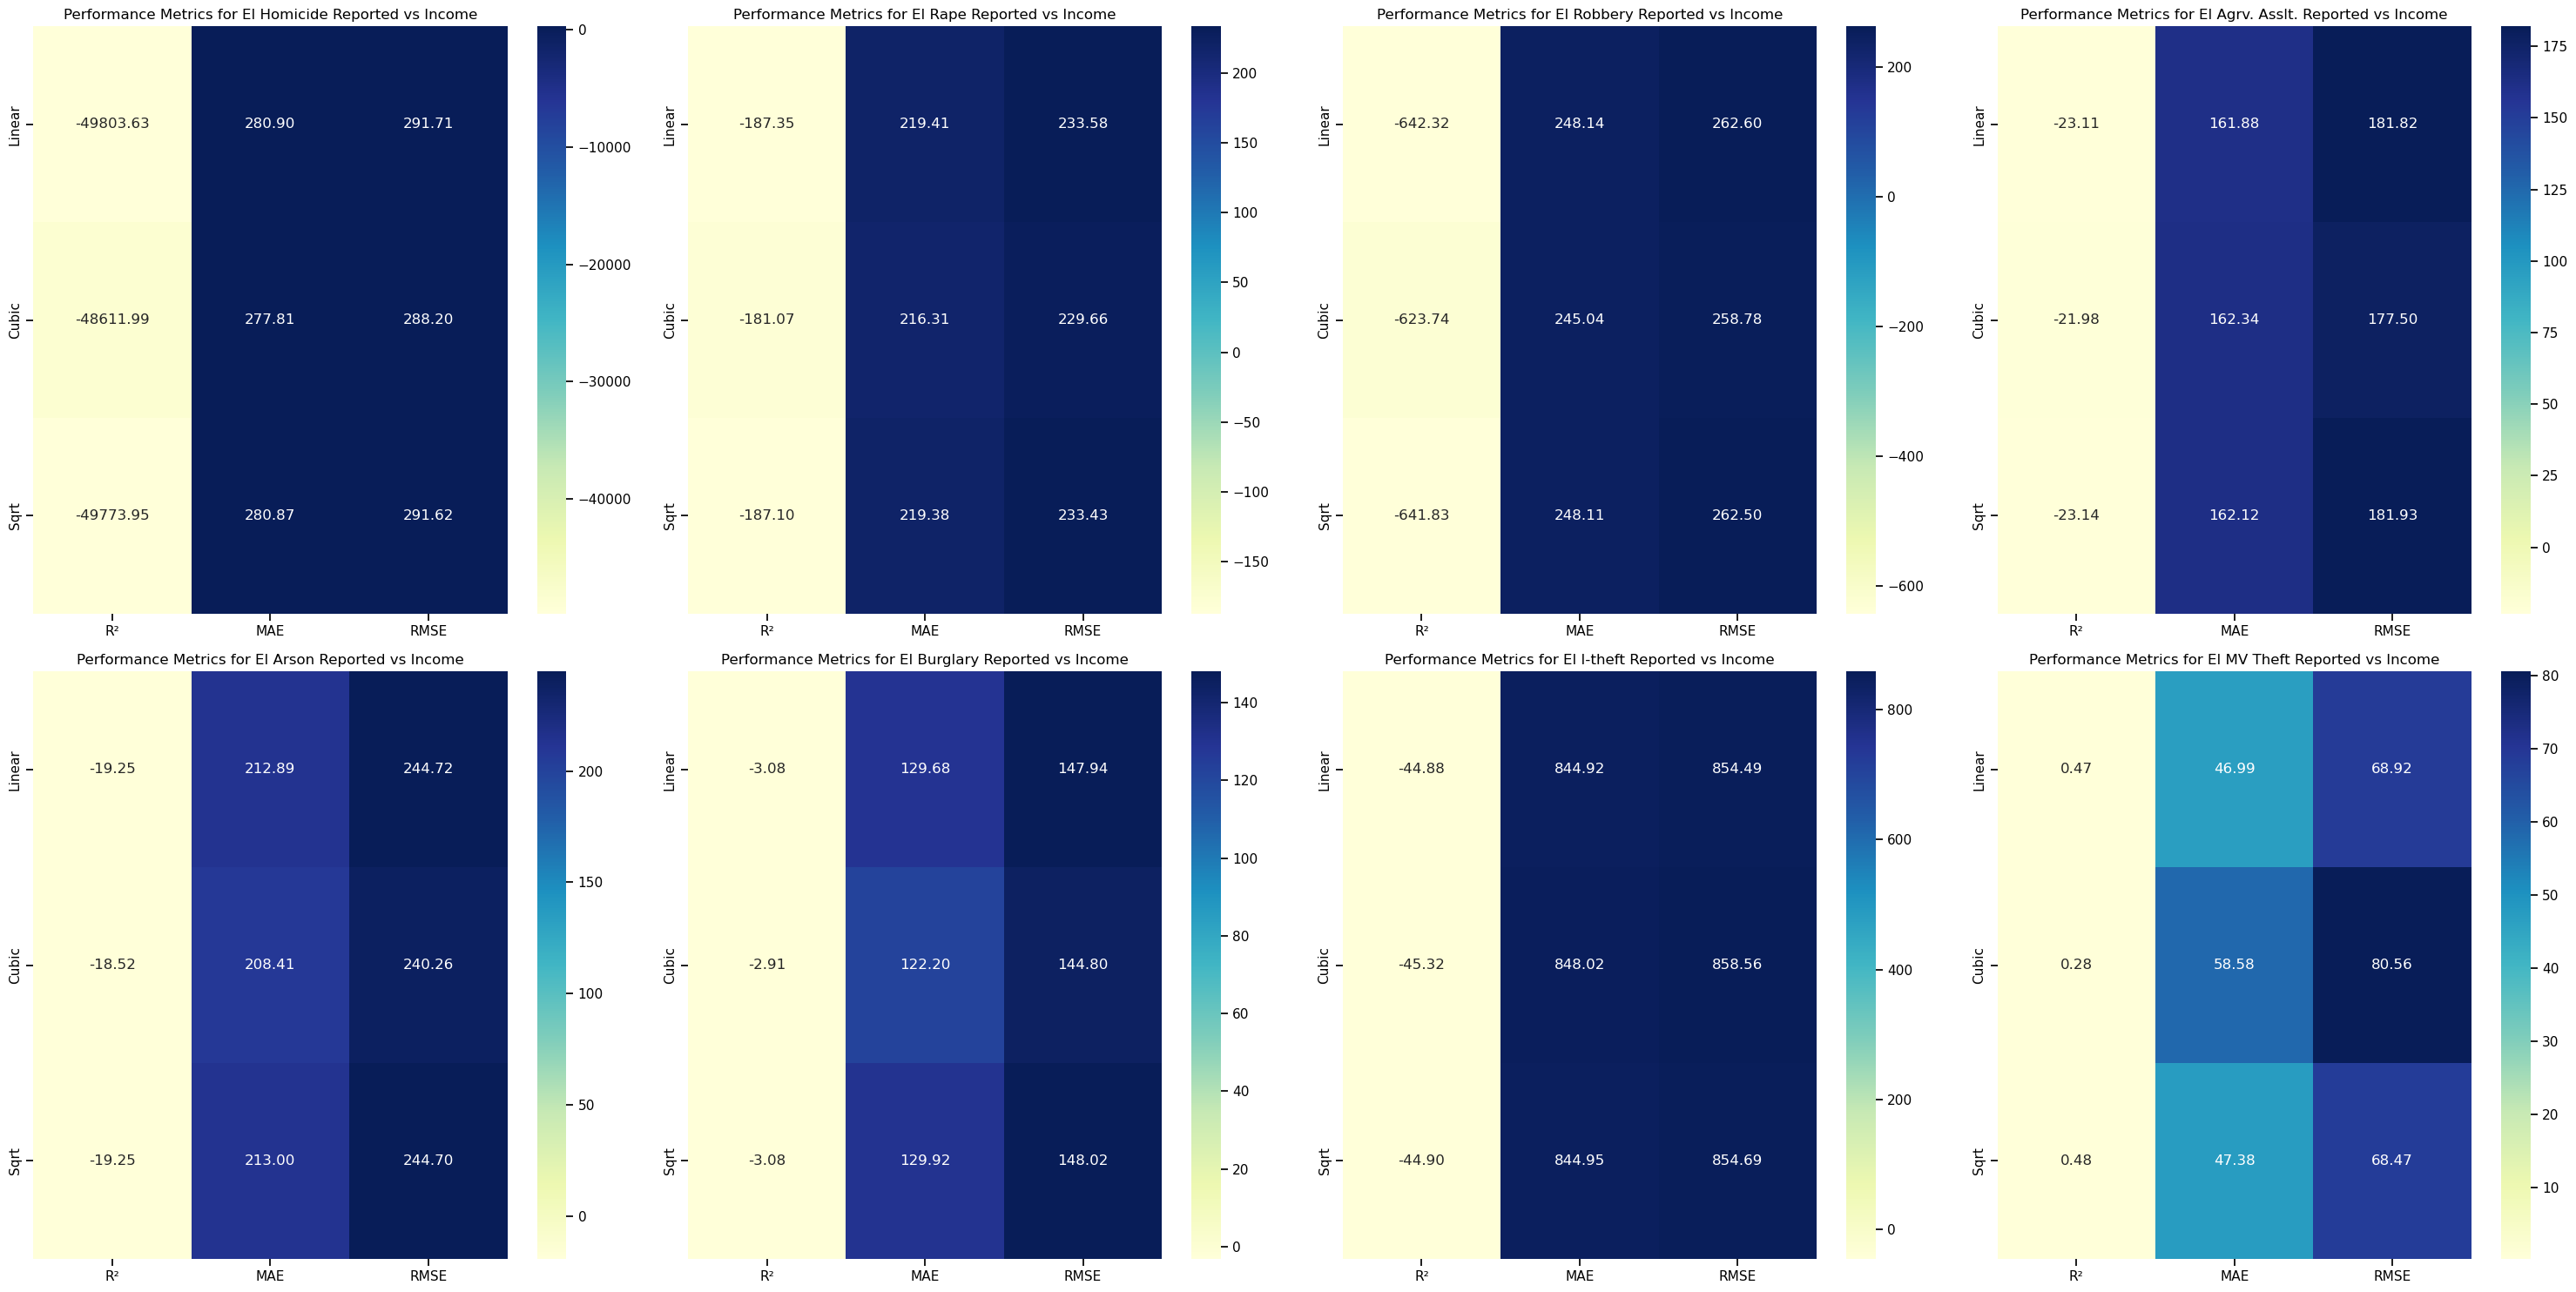

In [38]:
# Create subplots of performance matrices
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(El_cr_i.columns) - 1:]:
    fig.delaxes(ax)

# Iterate over axes and crime columns
for ax, crime in zip(axs, El_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = El_cr_i['PCI'].values
        ydata = El_cr_i[crime].values


        # Calculate performance metrics for each fit
        rmse_linear = calculate_rmse(ydata, y_linear_fit)
        rmse_cubic = calculate_rmse(ydata, y_cubic_fit)
        rmse_sqrt = calculate_rmse(ydata, y_sqrt_fit)

        mae_linear = calculate_mae(ydata, y_linear_fit)
        mae_cubic = calculate_mae(ydata, y_cubic_fit)
        mae_sqrt = calculate_mae(ydata, y_sqrt_fit)

        r_squared_linear = calculate_r_squared(ydata, y_linear_fit)
        r_squared_cubic = calculate_r_squared(ydata, y_cubic_fit)
        r_squared_sqrt = calculate_r_squared(ydata, y_sqrt_fit)

        # Create a DataFrame for performance metrics
        metrics_data = {
            'R²': [r_squared_linear, r_squared_cubic, r_squared_sqrt],
            'MAE': [mae_linear, mae_cubic, mae_sqrt],
            'RMSE': [rmse_linear, rmse_cubic, rmse_sqrt]
        }
        metrics_df = pd.DataFrame(metrics_data, index=['Linear', 'Cubic', 'Sqrt'])

        # Plotting the heatmap
        
        sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt=".2f", ax=ax)
        ax.set_title(f'Performance Metrics for {crime} vs Income')
        


plt.tight_layout()
plt.show()

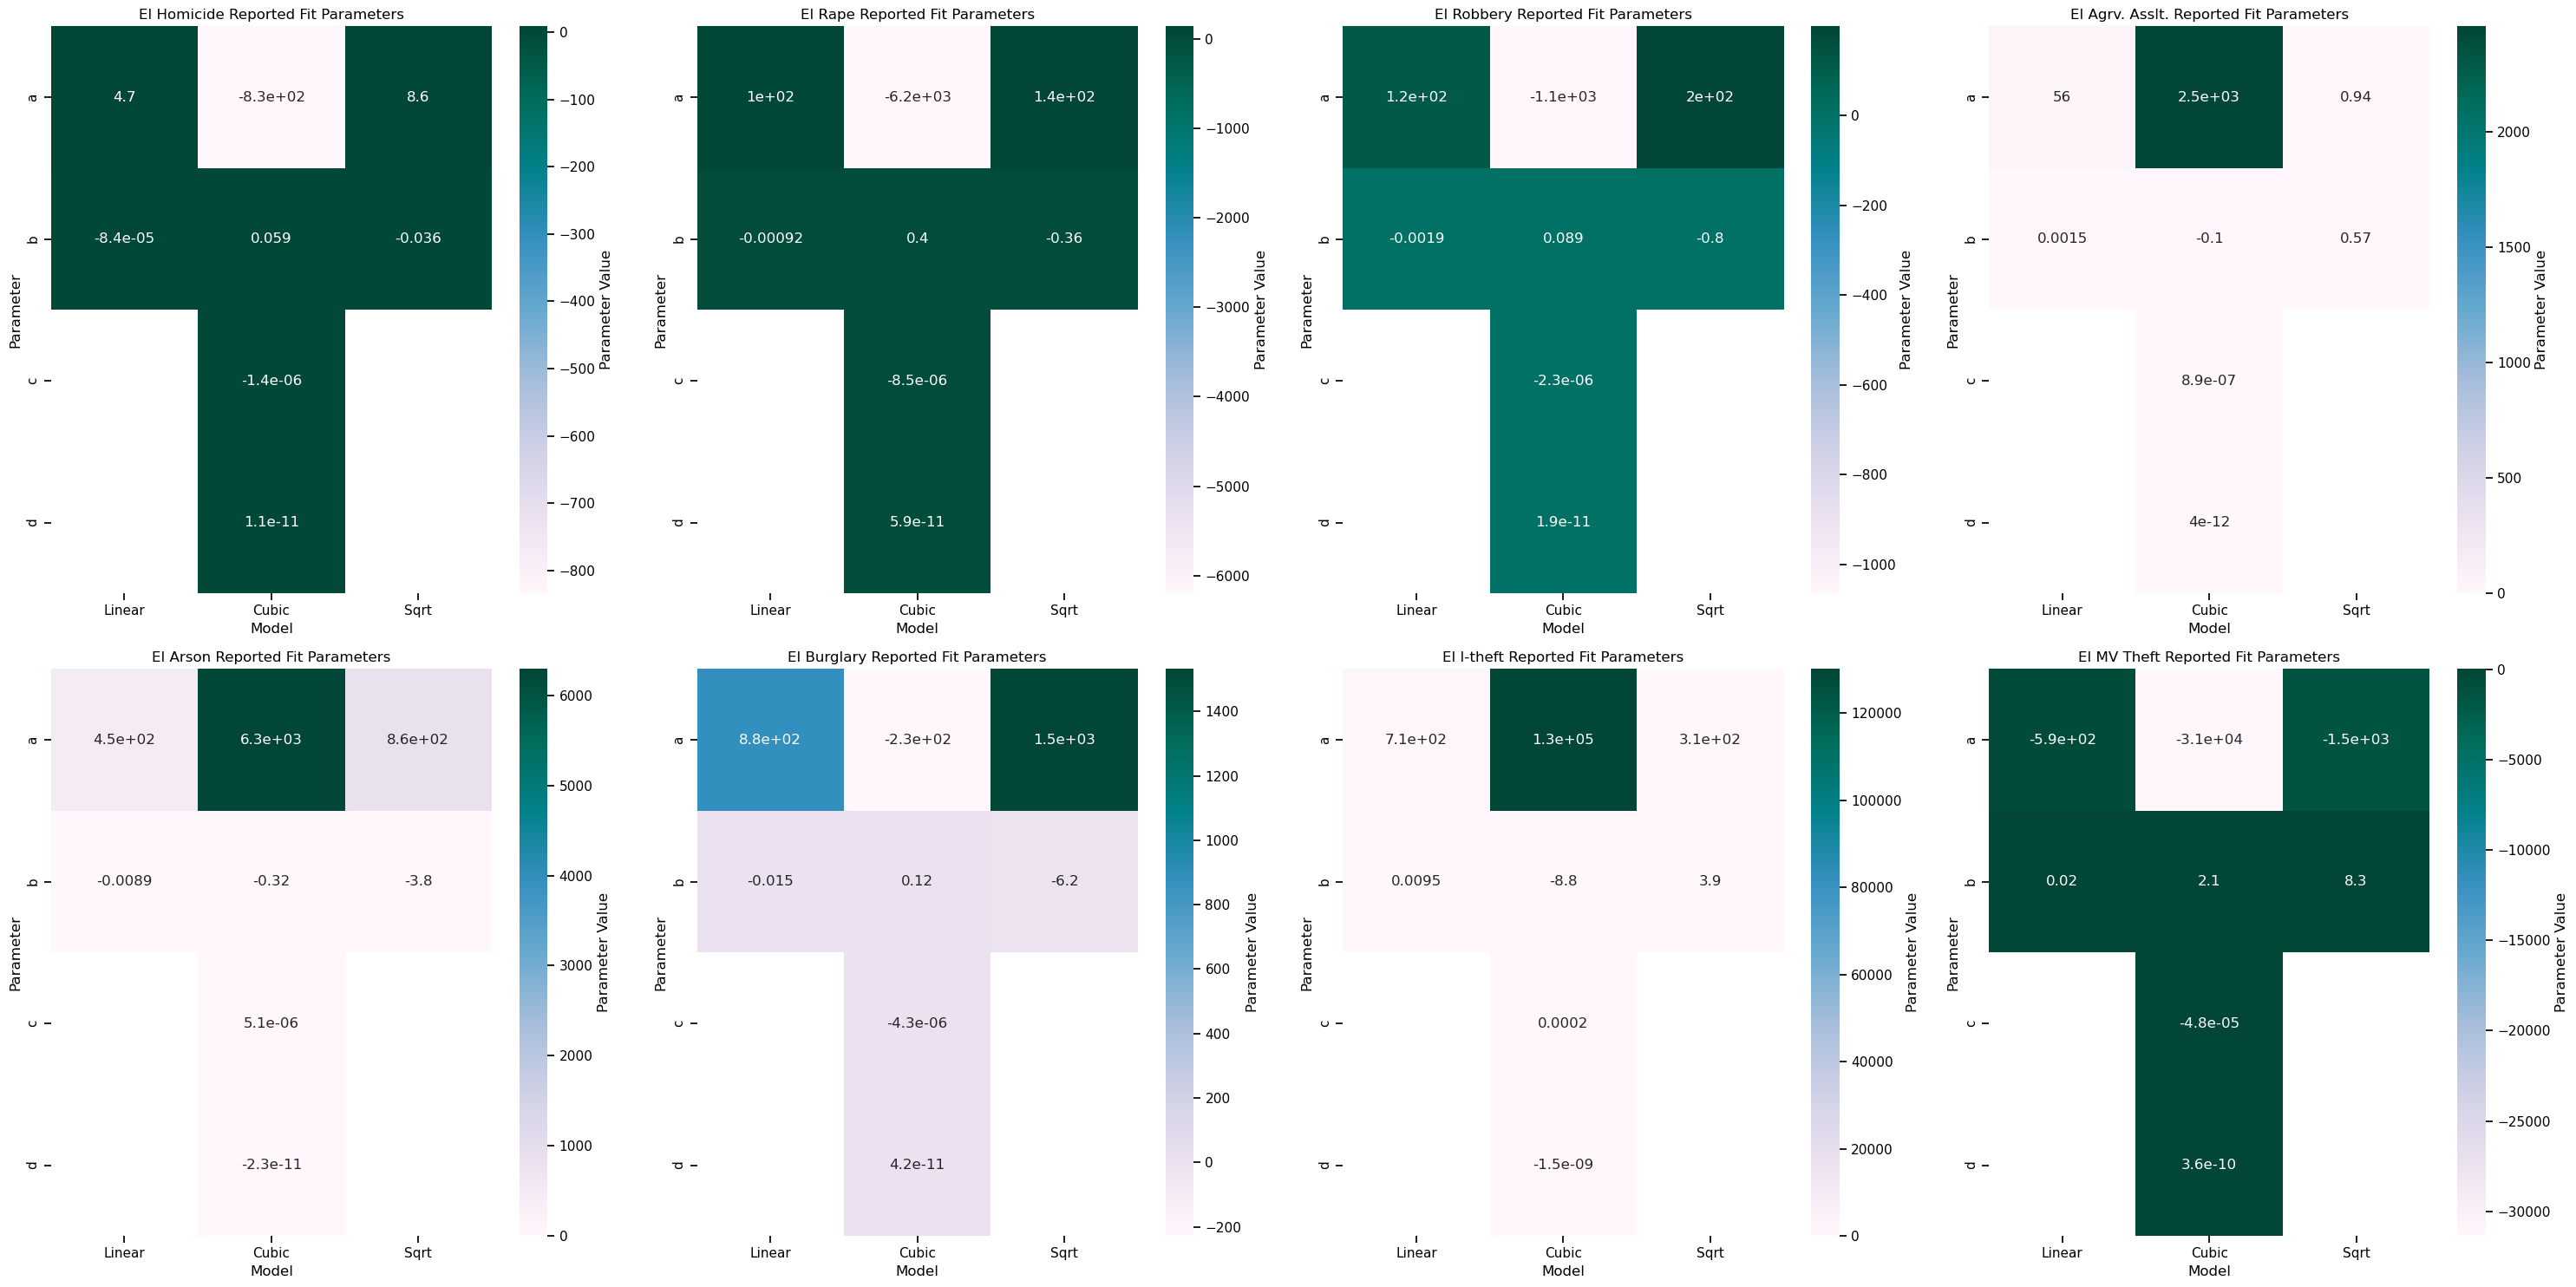

In [54]:
#use performance matrices to create parameter correlation models
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(El_cr_i.columns) - 1:]:
    fig.delaxes(ax)

# Iterate over axes and crime columns
for ax, crime in zip(axs, El_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = El_cr_i['PCI'].values
        ydata = El_cr_i[crime].values

        linear_params, _ = curve_fit(linear_eq, xdata, ydata)
        cubic_params, _ = curve_fit(cubic_eq, xdata, ydata)
        sqrt_params, _ = curve_fit(sqrt_eq, xdata, ydata)


        # Create DataFrames from the parameters
        params_df = pd.DataFrame({
            'Linear': np.append(linear_params, [np.nan, np.nan]), # Append NaN for the missing cubic parameter in the linear model for alignment
            'Cubic': cubic_params,
            'Sqrt': np.append(sqrt_params, [np.nan, np.nan]) # Append NaN for the missing cubic parameter in the sqrt model for alignment
        }, index=['a', 'b', 'c', 'd'])

        # Adjusting the DataFrame for better readability
        params_df.index.name = 'Parameter'
        params_df.columns.name = 'Model'

        # Plotting the heatmap
        sns.heatmap(params_df, annot=True, cmap='PuBuGn', ax=ax, cbar_kws={'label': 'Parameter Value'})
        ax.set_title(f'{crime} Fit Parameters')

plt.tight_layout()
plt.show()

###
# Create DataFrames from the parameters of the original data (without splitting)


In [39]:
#lansing population

Lpopulation_2022 = 112537
Lpopulation_2020 = 112644

L_2y_gr = growth_rate(Elpopulation_2020,Elpopulation_2022)

In [40]:
Lpopulation = []
for year in range(2012, 2023):
    population = calculate_population(year, Lpopulation_2022, -L_2y_gr)
    Lpopulation.append((year, round(population)))
Lpopulation_df = pd.DataFrame(Lpopulation, columns=['series', 'Population'])

In [41]:
Lpopulation_df.set_index('series', inplace=True)

In [42]:
L_data = pd.concat(L_data)
L_crime_df = L_data.T

In [43]:
L_crime_df_copy = L_crime_df.copy()

In [44]:
L_crime_df_copy.columns = L_crime_df_copy.iloc[0]

In [45]:
L_crime_df_copy = L_crime_df_copy.iloc[1:]

In [46]:
L_crime_df_copy.index = L_crime_df_copy.index.astype('int64')

In [47]:

L_crime_rates = crimepercapita(L_crime_df_copy, Lpopulation_df)

In [48]:
El_df.index = L_crime_rates.index

L_cr_i = pd.concat([L_crime_rates, El_df], axis=1)

In [49]:
L_cr_i

,L Homicide Reported,L Rape Reported,L Robbery Reported,L Aggrv. Asslt. Reported,L Arson Reported,L Burglary Reported,L l-theft Reported,L MV TheftReported,PCI
2012,10.621089,79.249661,166.66939,633.180281,31.863266,1074.36396,1817.840161,218.957826,38537
2013,5.767298,103.81136,210.918319,670.654341,25.54089,1049.648195,1925.453557,299.075585,38044
2014,8.308477,98.04003,207.711928,744.439552,17.447802,795.95211,1877.715833,309.906197,39048
2015,7.54072,102.218647,222.032308,786.748442,15.919298,806.857028,1803.069911,294.088076,41665
2016,8.449229,127.583352,220.524866,791.692718,16.053534,762.120418,1742.230934,318.535918,41994
2017,12.78075,99.689854,207.900208,829.044682,25.561501,757.472479,1936.709724,344.228213,42829
2018,7.733155,138.337544,158.10005,836.899177,18.903267,750.115997,1934.147892,376.346858,43132
2019,11.264286,131.7055,155.100555,852.619813,18.196155,662.859916,1933.991283,321.465397,43815
2020,14.854556,115.341262,171.264298,1201.471475,38.447087,879.914018,1752.837657,505.054918,48273
2021,22.910315,128.65023,150.679379,1253.017993,36.127804,637.082988,1503.269126,441.464145,50559


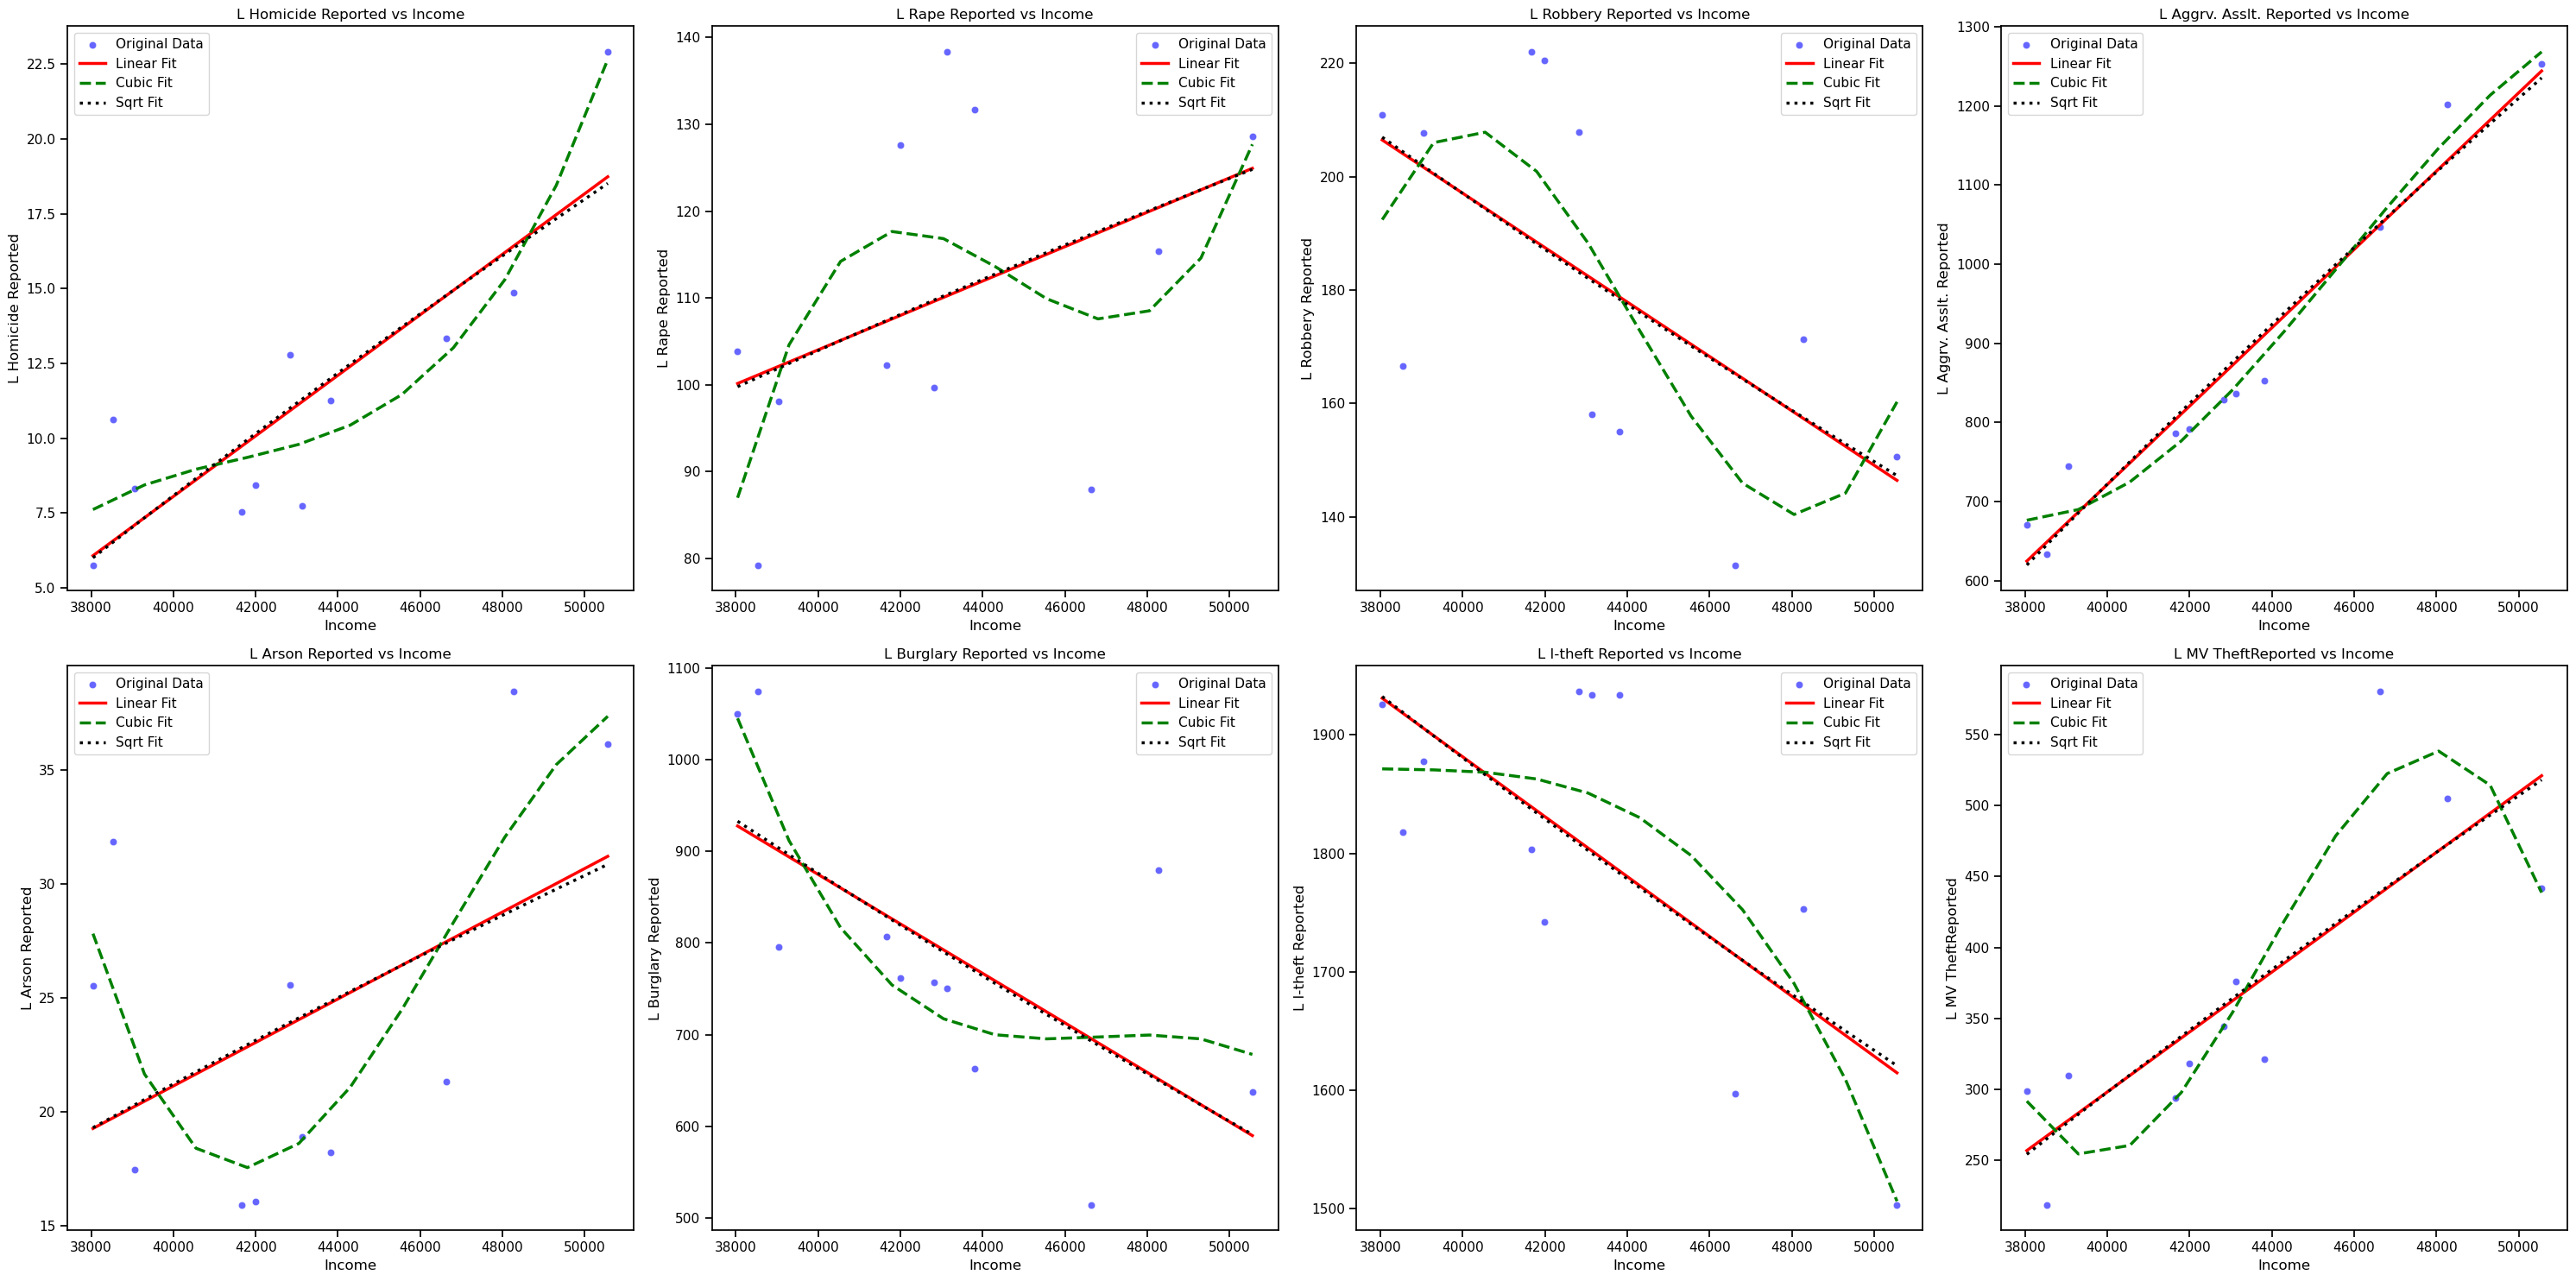

In [50]:
#Repeat same steps above for Lansing data
fig, axs = plt.subplots(2, 4, figsize=(30, 15))  # Adjust as needed

# Flatten the axes array
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(L_cr_i.columns)-1:]:
    fig.delaxes(ax)

for ax, crime in zip(axs, L_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = L_cr_i['PCI'].values
        ydata = L_cr_i[crime].values

        # Fit the models
        linear_params, _ = curve_fit(linear_eq, xdata, ydata)
        cubic_params, _ = curve_fit(cubic_eq, xdata, ydata)
        sqrt_params, _ = curve_fit(sqrt_eq, xdata, ydata)

        # Sort the x values for predictions by creating a new range
        x_fit = np.linspace(xdata.min(), xdata.max(), len(xdata))

        # Calculate fitted y values
        y_linear_fit = linear_eq(x_fit, *linear_params)
        y_cubic_fit = cubic_eq(x_fit, *cubic_params)
        y_sqrt_fit = sqrt_eq(x_fit, *sqrt_params)

        # Plotting
        sns.scatterplot(x=xdata, y=ydata, ax=ax, color='blue', alpha=0.6, label='Original Data')
        ax.plot(x_fit, y_linear_fit,  linestyle = '-', linewidth =2.5, color='red', label='Linear Fit')
        ax.plot(x_fit, y_cubic_fit,  linestyle = '--', linewidth =2.5, color='green', label='Cubic Fit')
        ax.plot(x_fit, y_sqrt_fit,  linestyle = ':', linewidth = 2.5, color='black', label='Sqrt Fit')
        ax.set_title(f'{crime} vs Income')
        ax.set_xlabel('Income')
        ax.set_ylabel(crime)
        ax.legend()

plt.tight_layout()
plt.show()

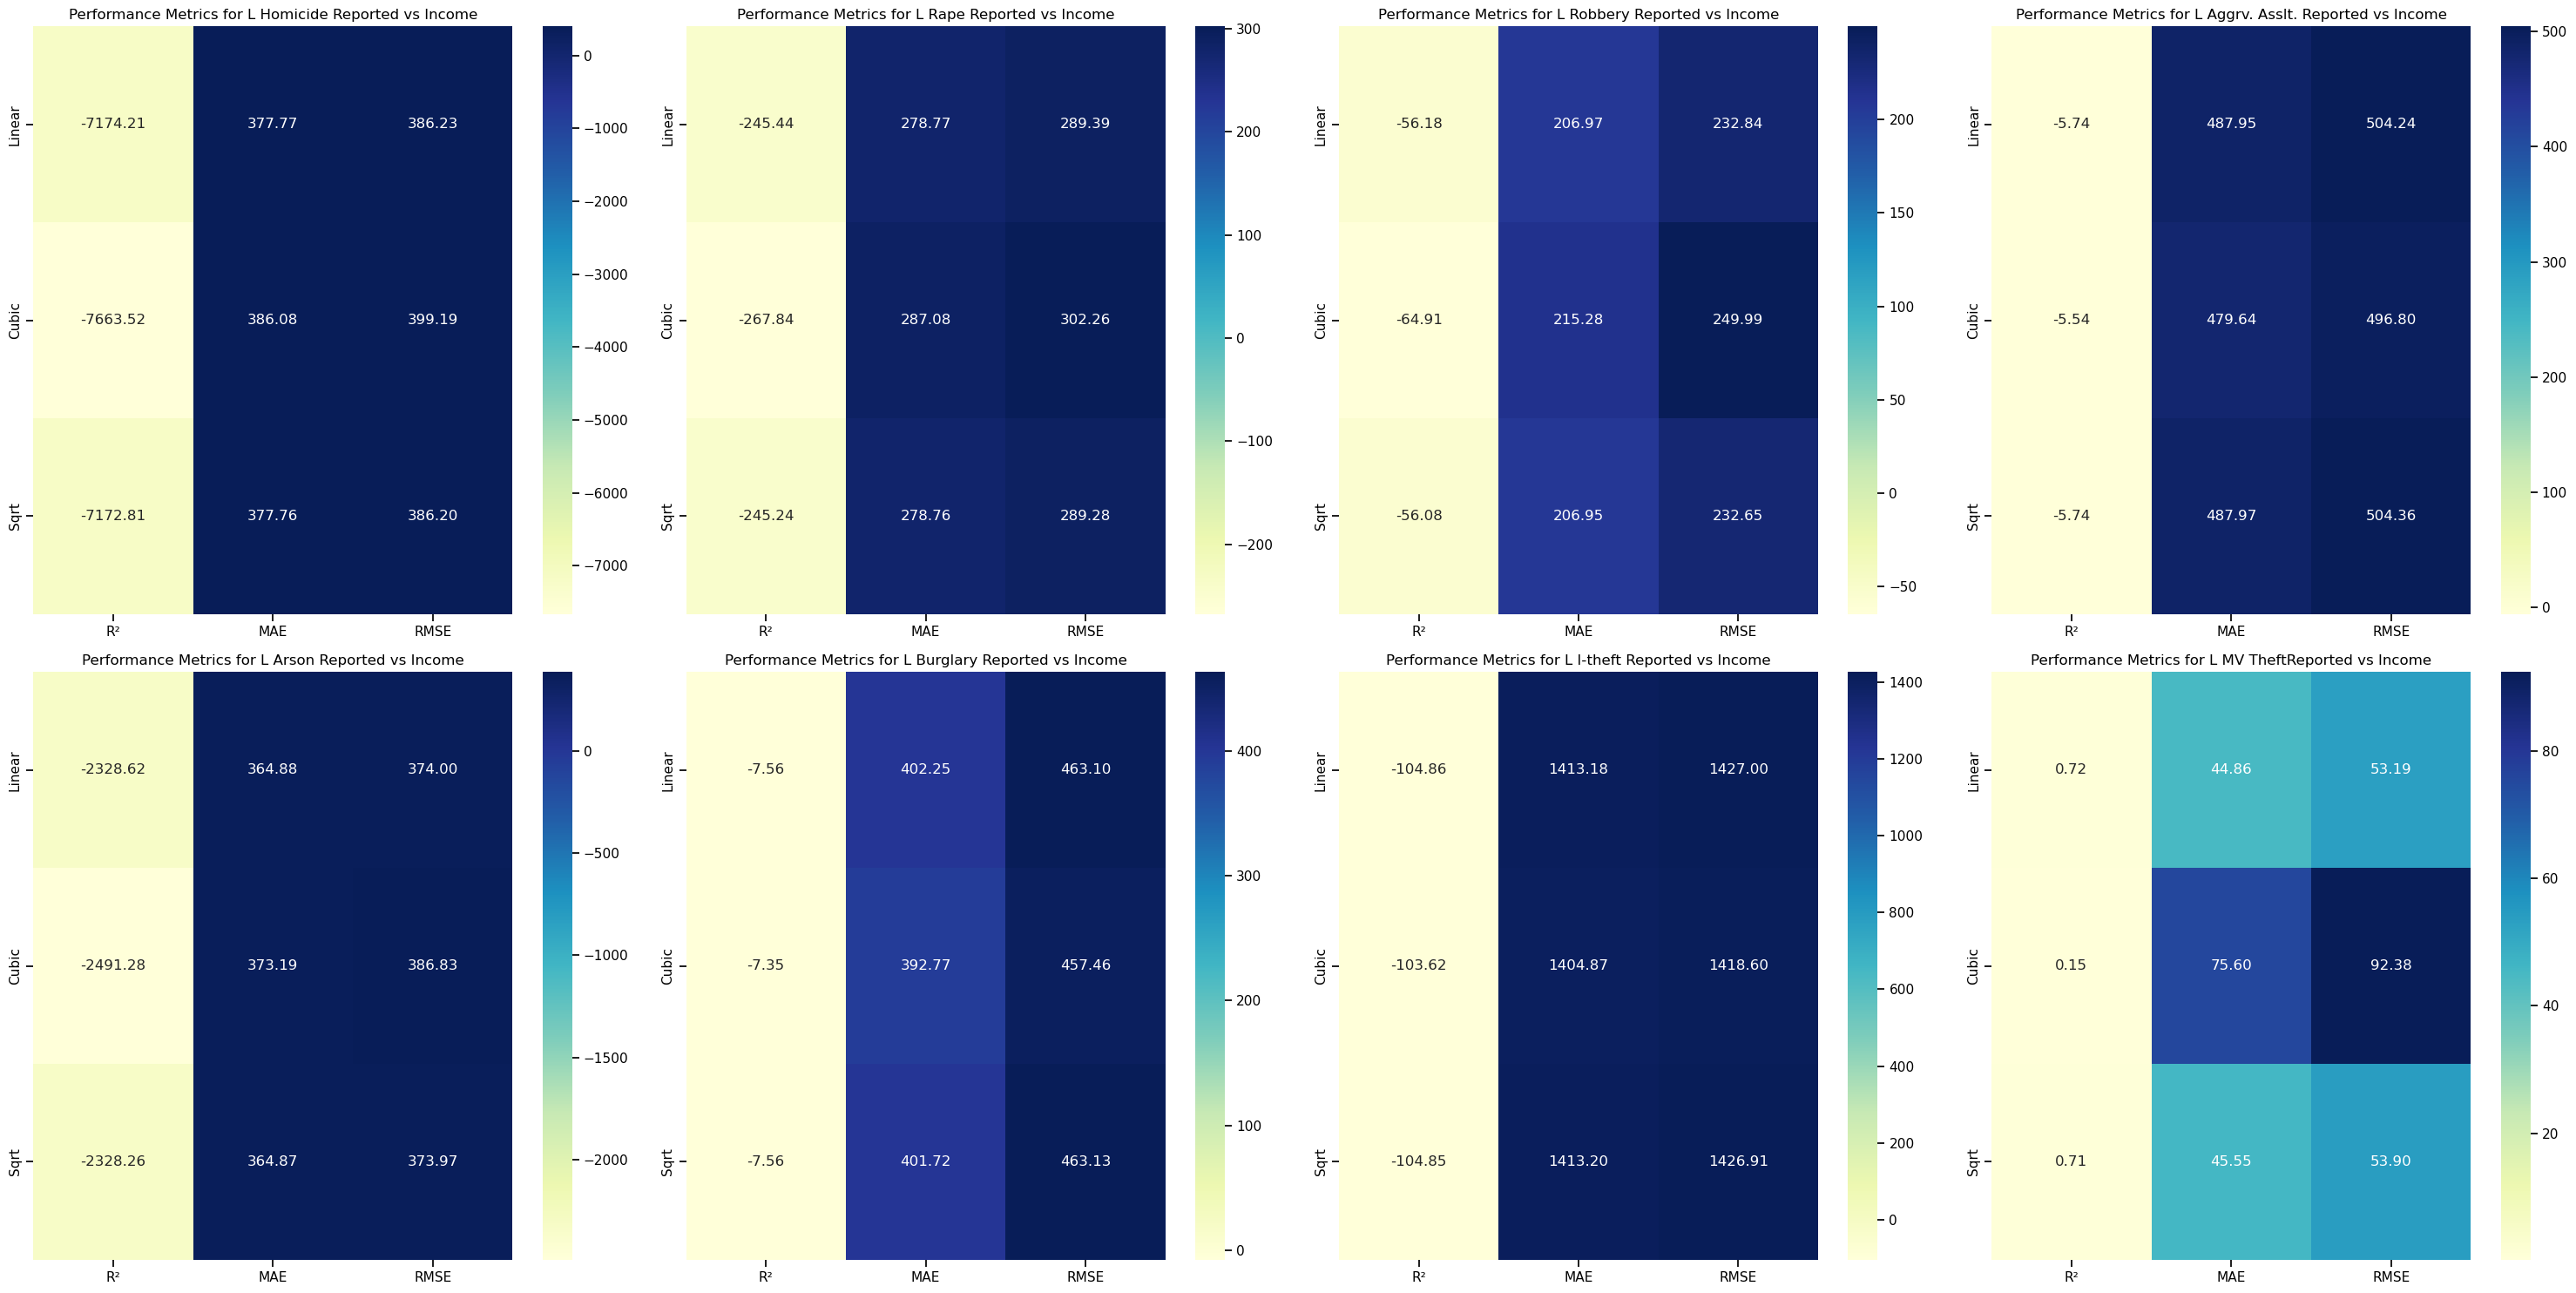

In [51]:
# Create the subplots
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(L_cr_i.columns) - 1:]:
    fig.delaxes(ax)

# Iterate over axes and crime columns
for ax, crime in zip(axs, L_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = L_cr_i['PCI'].values
        ydata = L_cr_i[crime].values


        # Calculate performance metrics for each fit
        rmse_linear = calculate_rmse(ydata, y_linear_fit)
        rmse_cubic = calculate_rmse(ydata, y_cubic_fit)
        rmse_sqrt = calculate_rmse(ydata, y_sqrt_fit)

        mae_linear = calculate_mae(ydata, y_linear_fit)
        mae_cubic = calculate_mae(ydata, y_cubic_fit)
        mae_sqrt = calculate_mae(ydata, y_sqrt_fit)

        r_squared_linear = calculate_r_squared(ydata, y_linear_fit)
        r_squared_cubic = calculate_r_squared(ydata, y_cubic_fit)
        r_squared_sqrt = calculate_r_squared(ydata, y_sqrt_fit)

        # Create a DataFrame for performance metrics
        metrics_data = {
            'R²': [r_squared_linear, r_squared_cubic, r_squared_sqrt],
            'MAE': [mae_linear, mae_cubic, mae_sqrt],
            'RMSE': [rmse_linear, rmse_cubic, rmse_sqrt]
        }
        metrics_df = pd.DataFrame(metrics_data, index=['Linear', 'Cubic', 'Sqrt'])

        # Plotting the heatmap
        
        sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt=".2f", ax=ax)
        ax.set_title(f'Performance Metrics for {crime} vs Income')
        


plt.tight_layout()
plt.show()

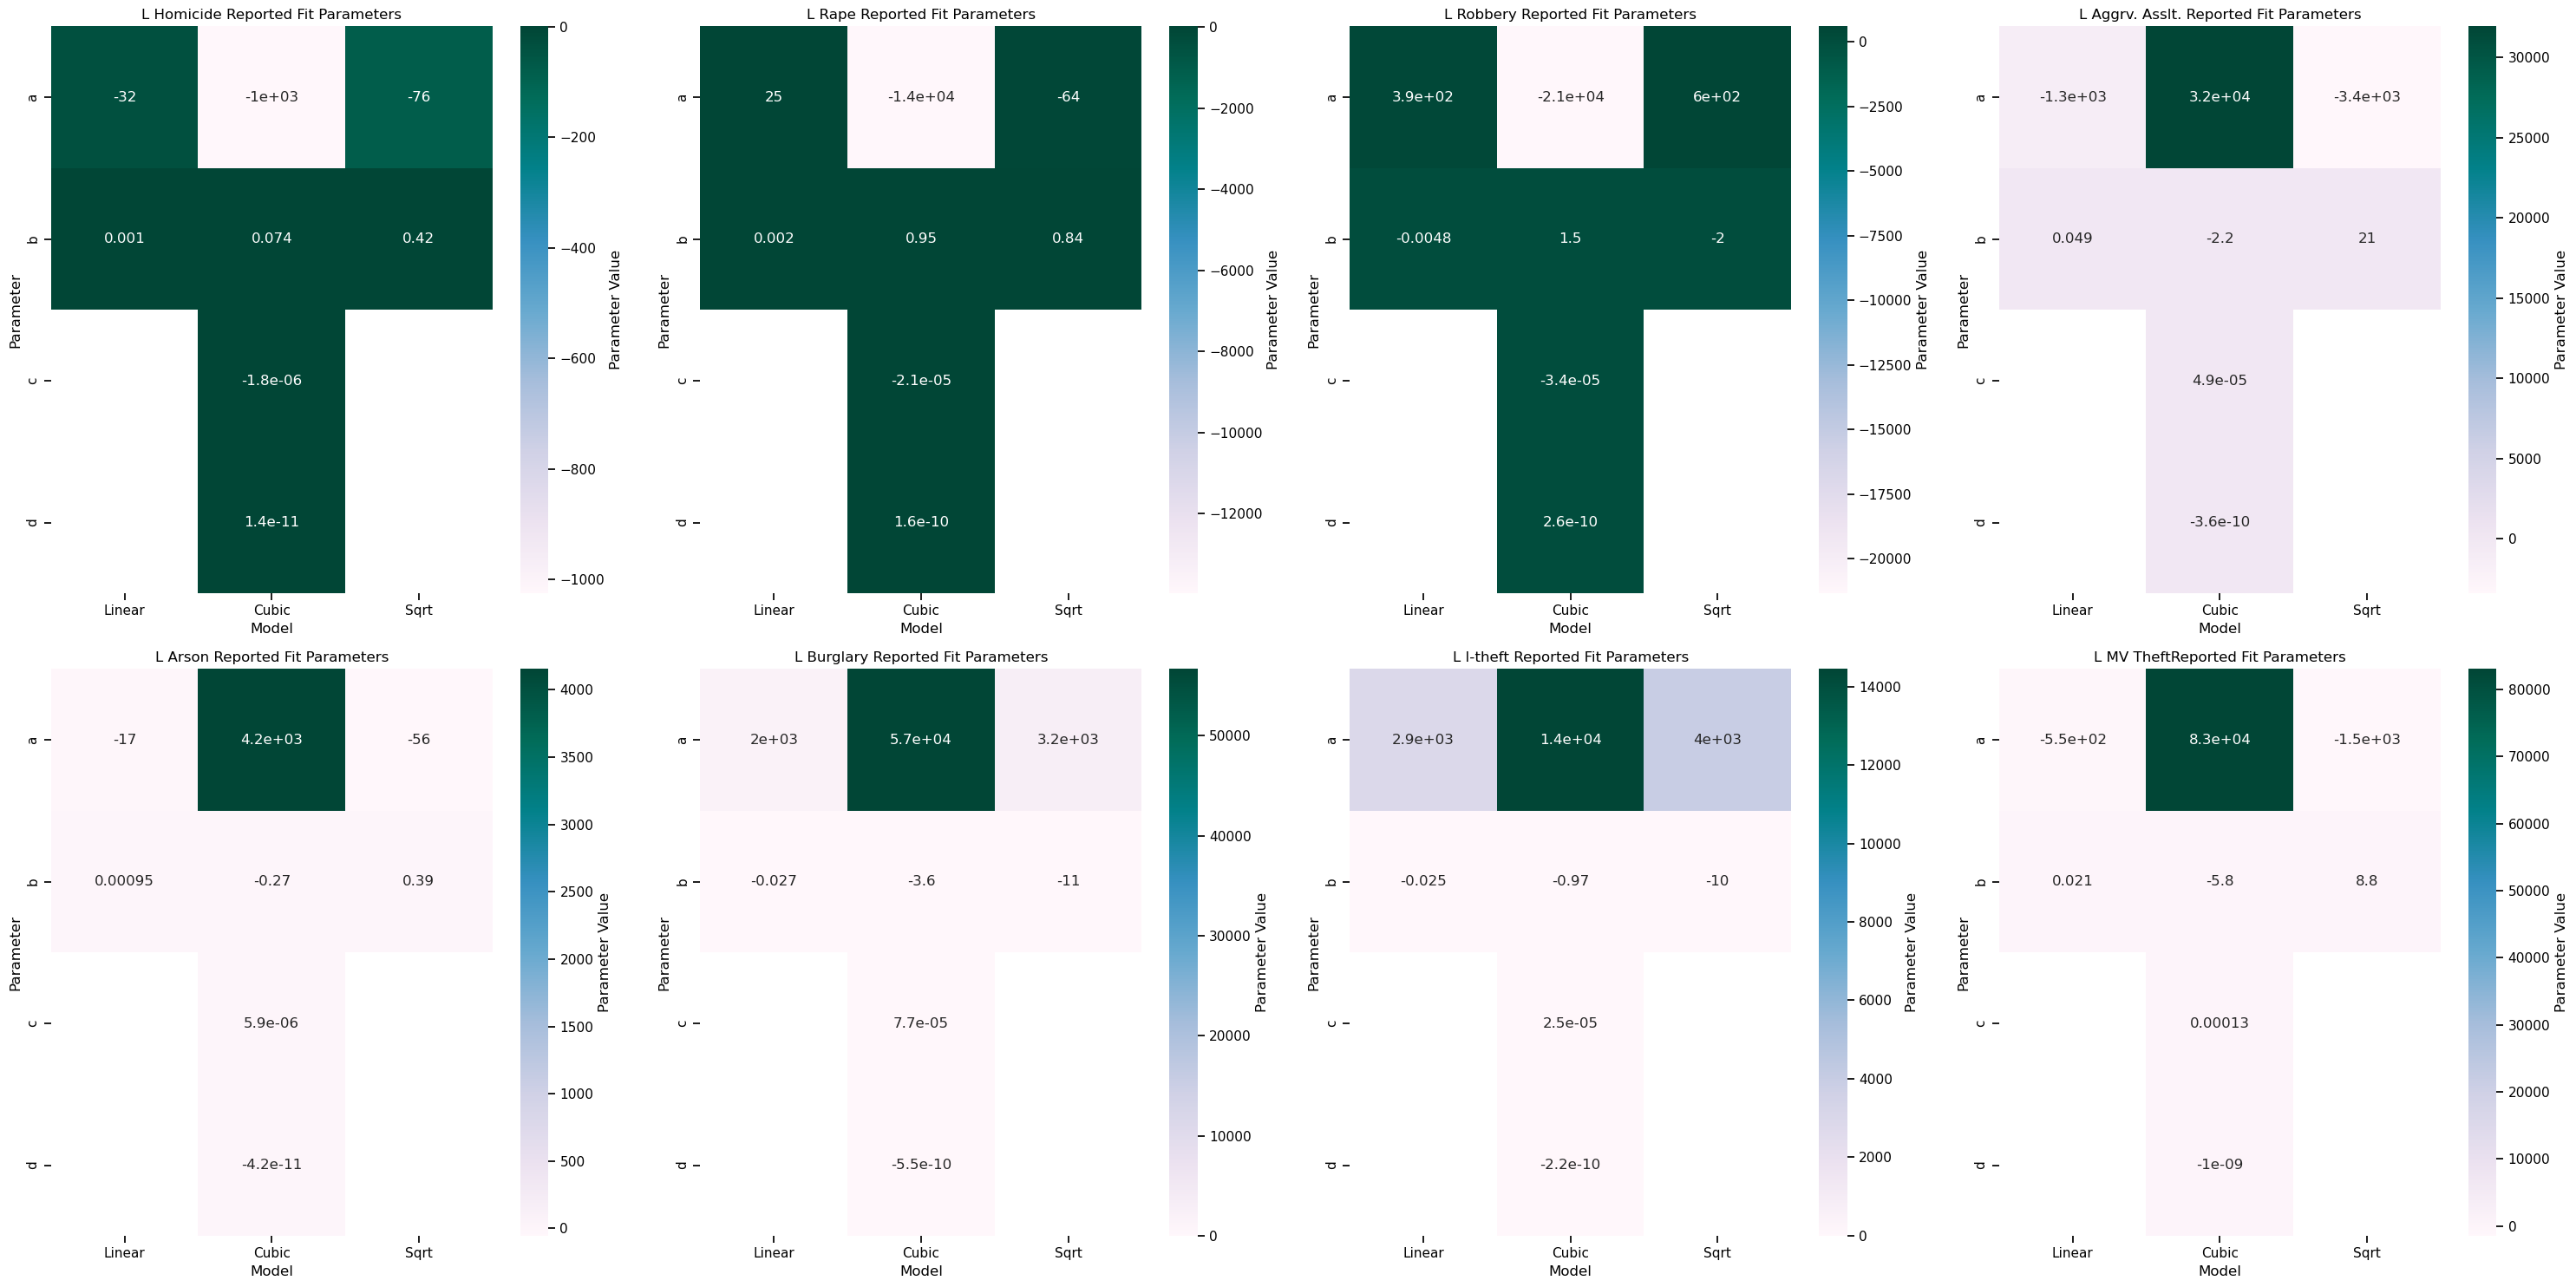

In [55]:
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(L_cr_i.columns) - 1:]:
    fig.delaxes(ax)

# Iterate over axes and crime columns
for ax, crime in zip(axs, L_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = L_cr_i['PCI'].values
        ydata = L_cr_i[crime].values

        linear_params, _ = curve_fit(linear_eq, xdata, ydata)
        cubic_params, _ = curve_fit(cubic_eq, xdata, ydata)
        sqrt_params, _ = curve_fit(sqrt_eq, xdata, ydata)


        # Create DataFrames from the parameters
        params_df = pd.DataFrame({
            'Linear': np.append(linear_params, [np.nan, np.nan]), # Append NaN for the missing cubic parameter in the linear model for alignment
            'Cubic': cubic_params,
            'Sqrt': np.append(sqrt_params, [np.nan, np.nan]) # Append NaN for the missing cubic parameter in the sqrt model for alignment
        }, index=['a', 'b', 'c', 'd'])

        # Adjusting the DataFrame for better readability
        params_df.index.name = 'Parameter'
        params_df.columns.name = 'Model'

        # Plotting the heatmap
        sns.heatmap(params_df, annot=True, cmap='PuBuGn', ax=ax, cbar_kws={'label': 'Parameter Value'})
        ax.set_title(f'{crime} Fit Parameters')

plt.tight_layout()
plt.show()


## Results

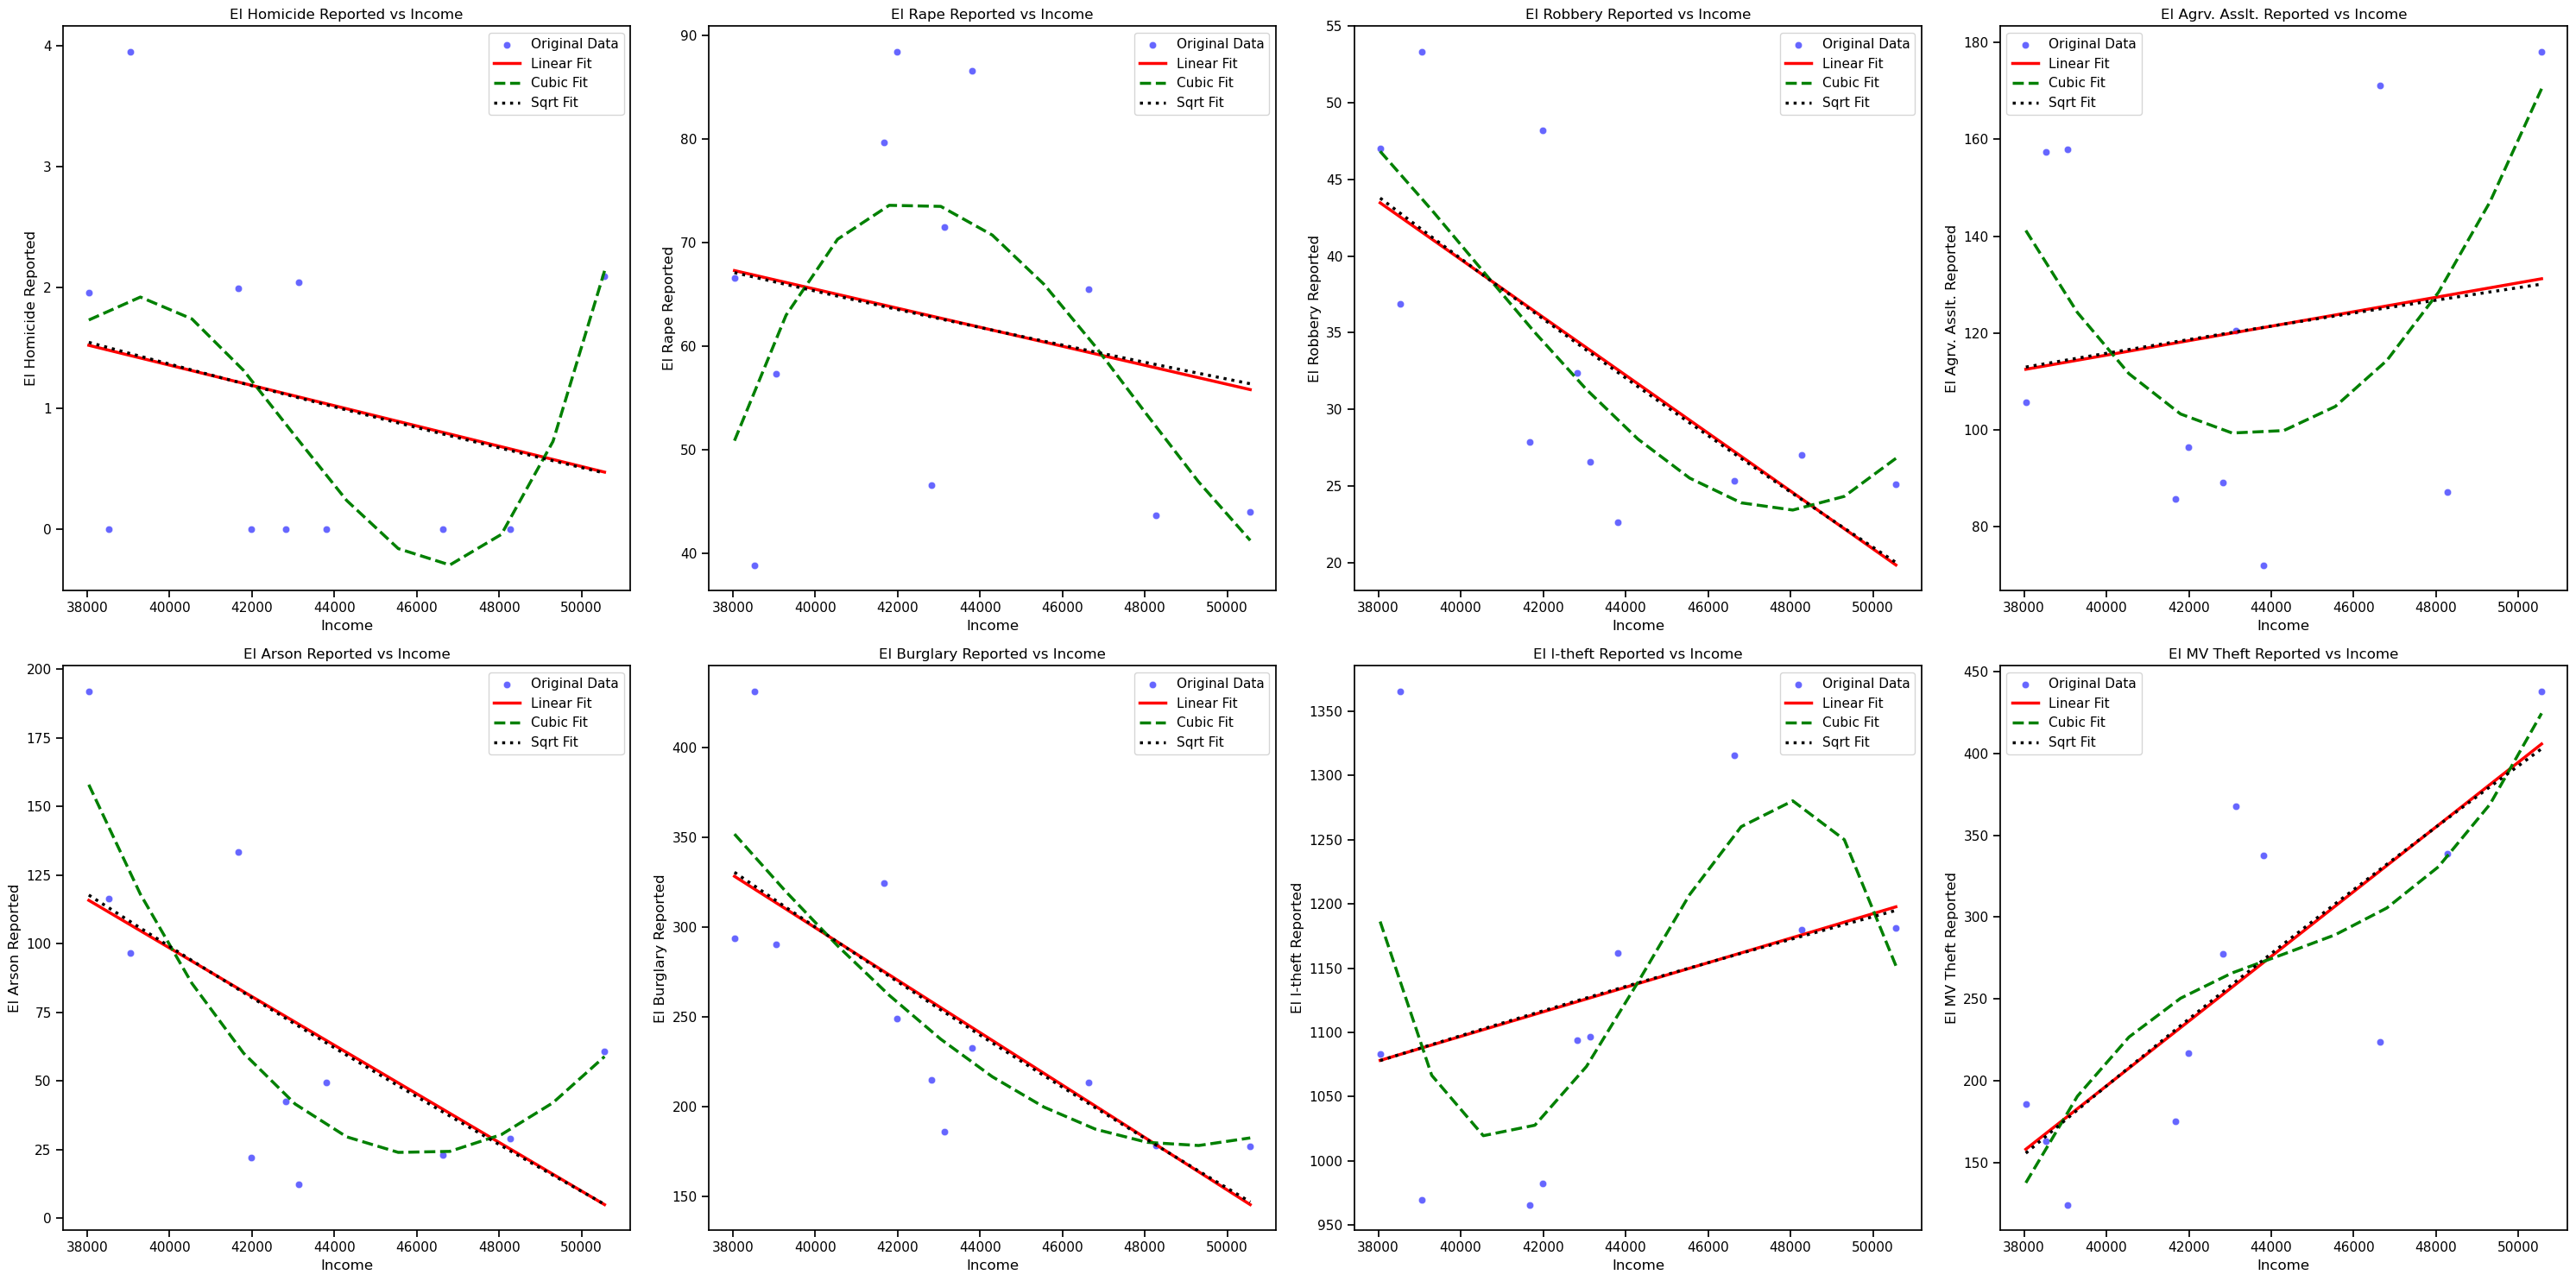

In [57]:
fig, axs = plt.subplots(2, 4, figsize=(30, 15))  # Adjust as needed

# Flatten the axes array
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(El_cr_i.columns)-1:]:
    fig.delaxes(ax)

for ax, crime in zip(axs, El_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = El_cr_i['PCI'].values
        ydata = El_cr_i[crime].values

        # Fit the models
        linear_params, _ = curve_fit(linear_eq, xdata, ydata)
        cubic_params, _ = curve_fit(cubic_eq, xdata, ydata)
        sqrt_params, _ = curve_fit(sqrt_eq, xdata, ydata)

        # Sort the x values for predictions by creating a new range
        x_fit = np.linspace(xdata.min(), xdata.max(), len(xdata))

        # Calculate fitted y values
        y_linear_fit = linear_eq(x_fit, *linear_params)
        y_cubic_fit = cubic_eq(x_fit, *cubic_params)
        y_sqrt_fit = sqrt_eq(x_fit, *sqrt_params)

        # Plotting
        sns.scatterplot(x=xdata, y=ydata, ax=ax, color='blue', alpha=0.6, label='Original Data')
        ax.plot(x_fit, y_linear_fit,  linestyle = '-', linewidth =2.5, color='red', label='Linear Fit')
        ax.plot(x_fit, y_cubic_fit,  linestyle = '--', linewidth =2.5, color='green', label='Cubic Fit')
        ax.plot(x_fit, y_sqrt_fit,  linestyle = ':', linewidth = 2.5, color='black', label='Sqrt Fit')
        ax.set_title(f'{crime} vs Income')
        ax.set_xlabel('Income')
        ax.set_ylabel(crime)
        ax.legend()

plt.tight_layout()
plt.show()

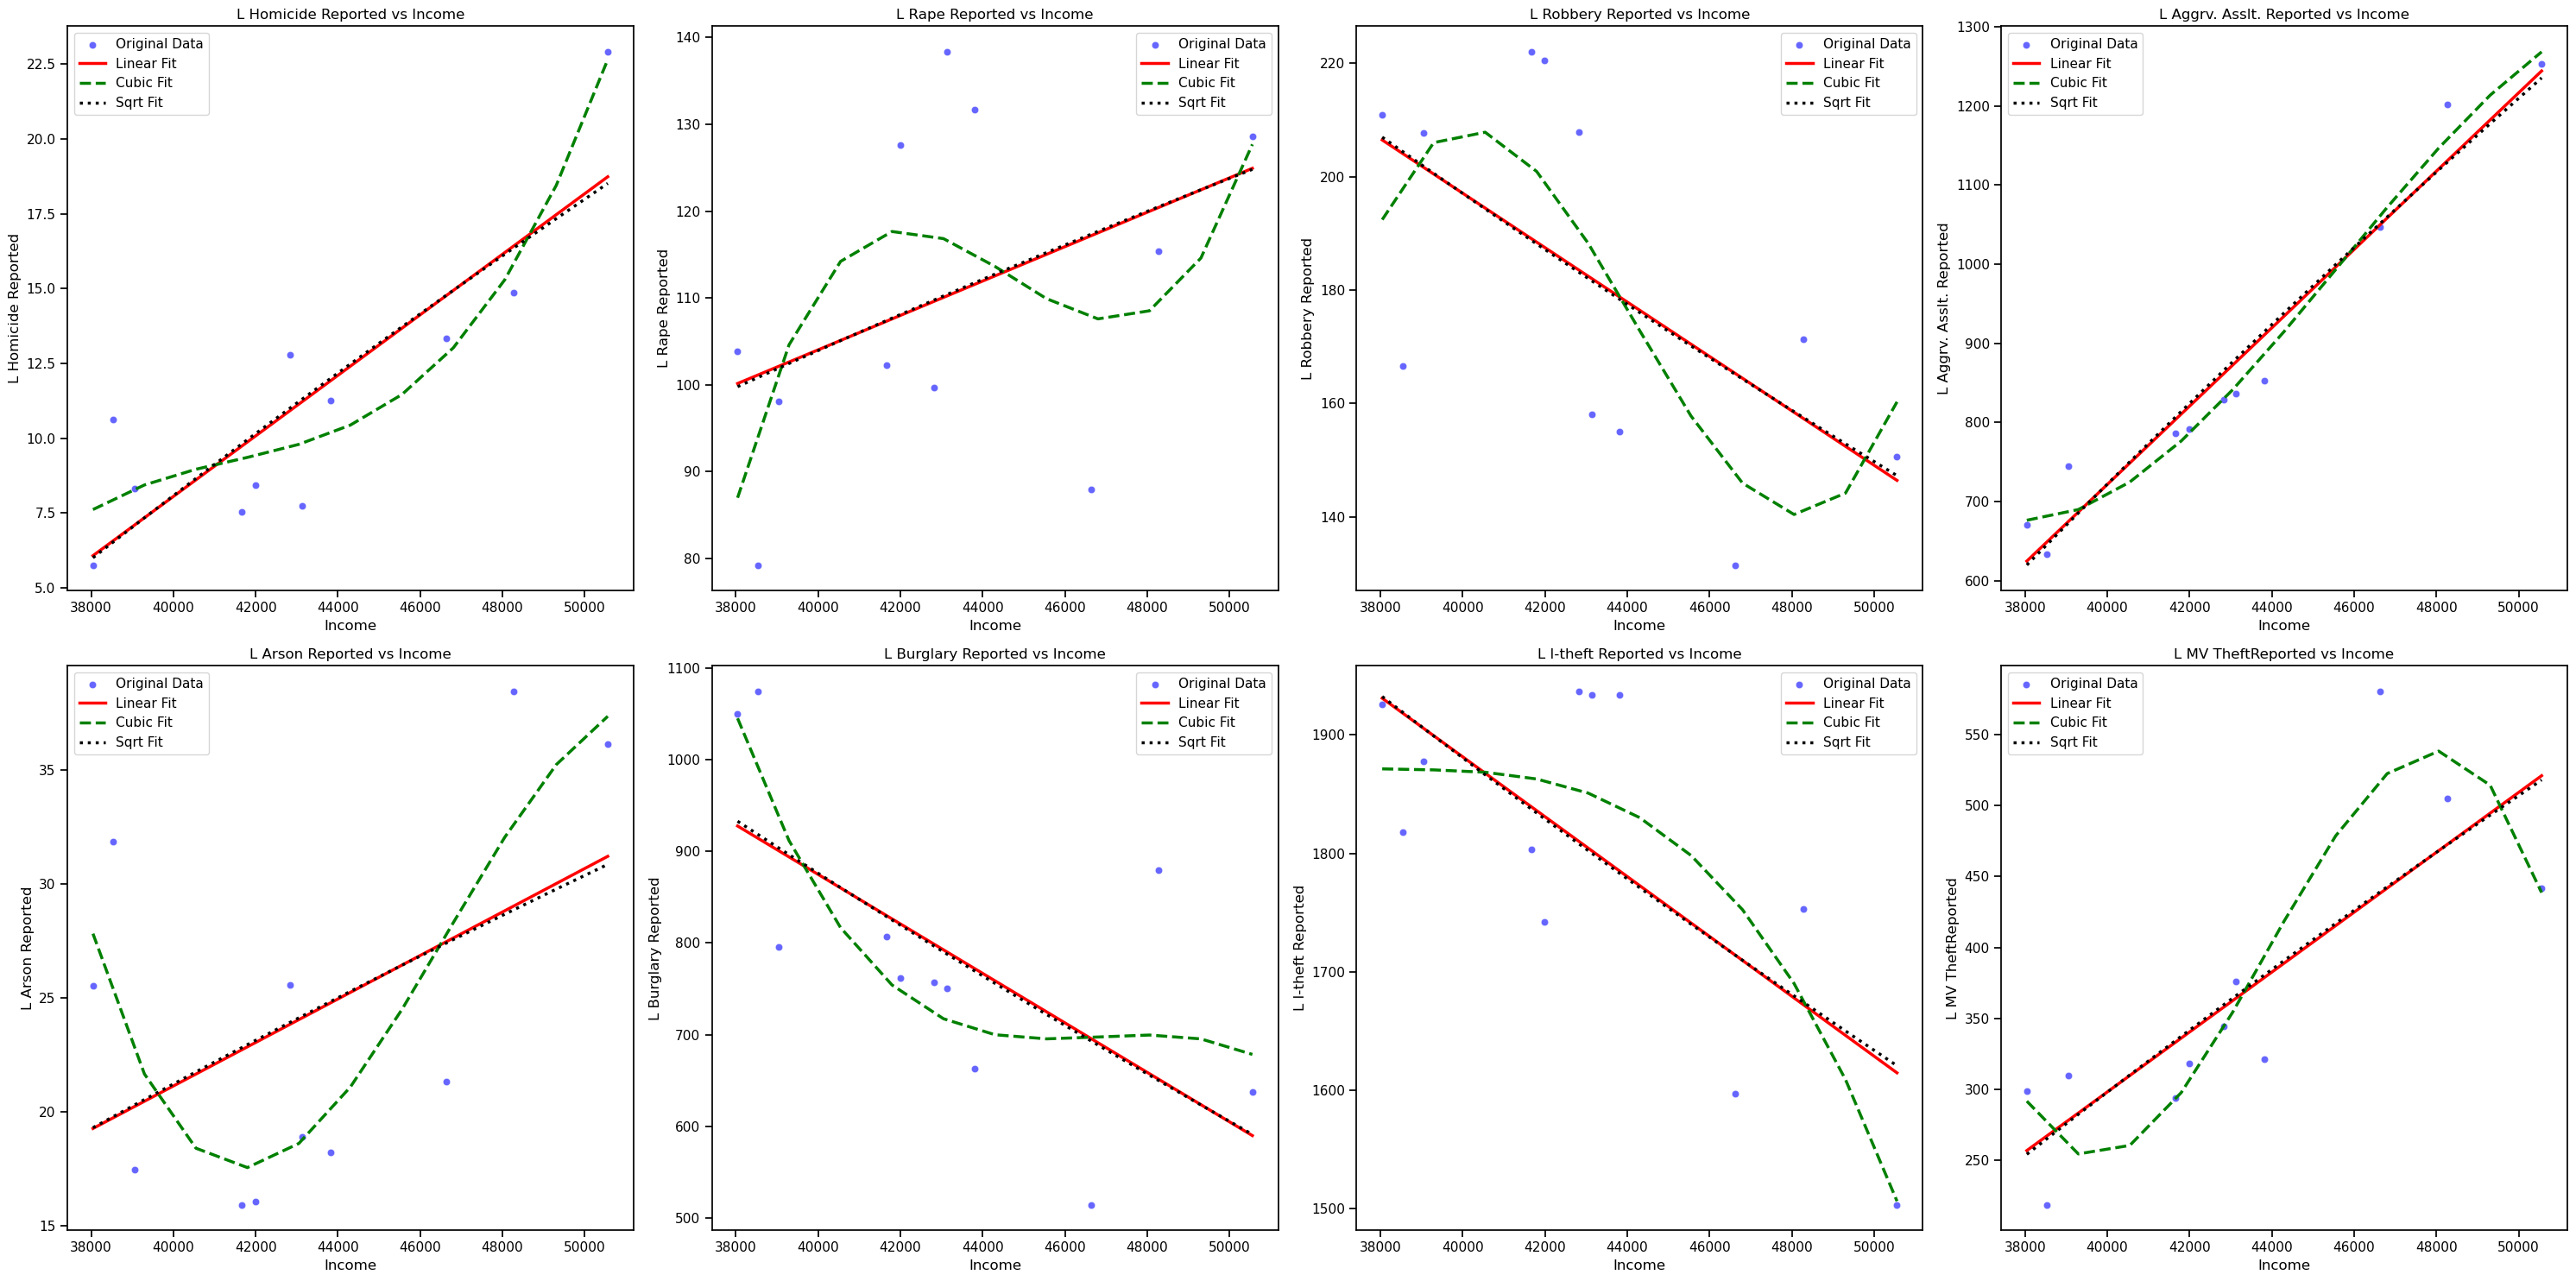

In [58]:
fig, axs = plt.subplots(2, 4, figsize=(30, 15))  # Adjust as needed

# Flatten the axes array
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(L_cr_i.columns)-1:]:
    fig.delaxes(ax)

for ax, crime in zip(axs, L_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = L_cr_i['PCI'].values
        ydata = L_cr_i[crime].values

        # Fit the models
        linear_params, _ = curve_fit(linear_eq, xdata, ydata)
        cubic_params, _ = curve_fit(cubic_eq, xdata, ydata)
        sqrt_params, _ = curve_fit(sqrt_eq, xdata, ydata)

        # Sort the x values for predictions by creating a new range
        x_fit = np.linspace(xdata.min(), xdata.max(), len(xdata))

        # Calculate fitted y values
        y_linear_fit = linear_eq(x_fit, *linear_params)
        y_cubic_fit = cubic_eq(x_fit, *cubic_params)
        y_sqrt_fit = sqrt_eq(x_fit, *sqrt_params)

        # Plotting
        sns.scatterplot(x=xdata, y=ydata, ax=ax, color='blue', alpha=0.6, label='Original Data')
        ax.plot(x_fit, y_linear_fit,  linestyle = '-', linewidth =2.5, color='red', label='Linear Fit')
        ax.plot(x_fit, y_cubic_fit,  linestyle = '--', linewidth =2.5, color='green', label='Cubic Fit')
        ax.plot(x_fit, y_sqrt_fit,  linestyle = ':', linewidth = 2.5, color='black', label='Sqrt Fit')
        ax.set_title(f'{crime} vs Income')
        ax.set_xlabel('Income')
        ax.set_ylabel(crime)
        ax.legend()

plt.tight_layout()
plt.show()

Once the crime rates and Income in a neighborhood are plotted, the results can be analyzed to determine the correlations of the data. The plots above with best fits lines of linear, cubic, and square root functions show how each crime in Lansing-East Lansing relate to income from the years 2012 to 2022. The charts can now be used to calculate performance matrices for each crime and the best fit curves. The performance matrix for each crime is very useful as they can be compared to the values of the parameters which can then be used to form a conclusion on the correlations of the variables.

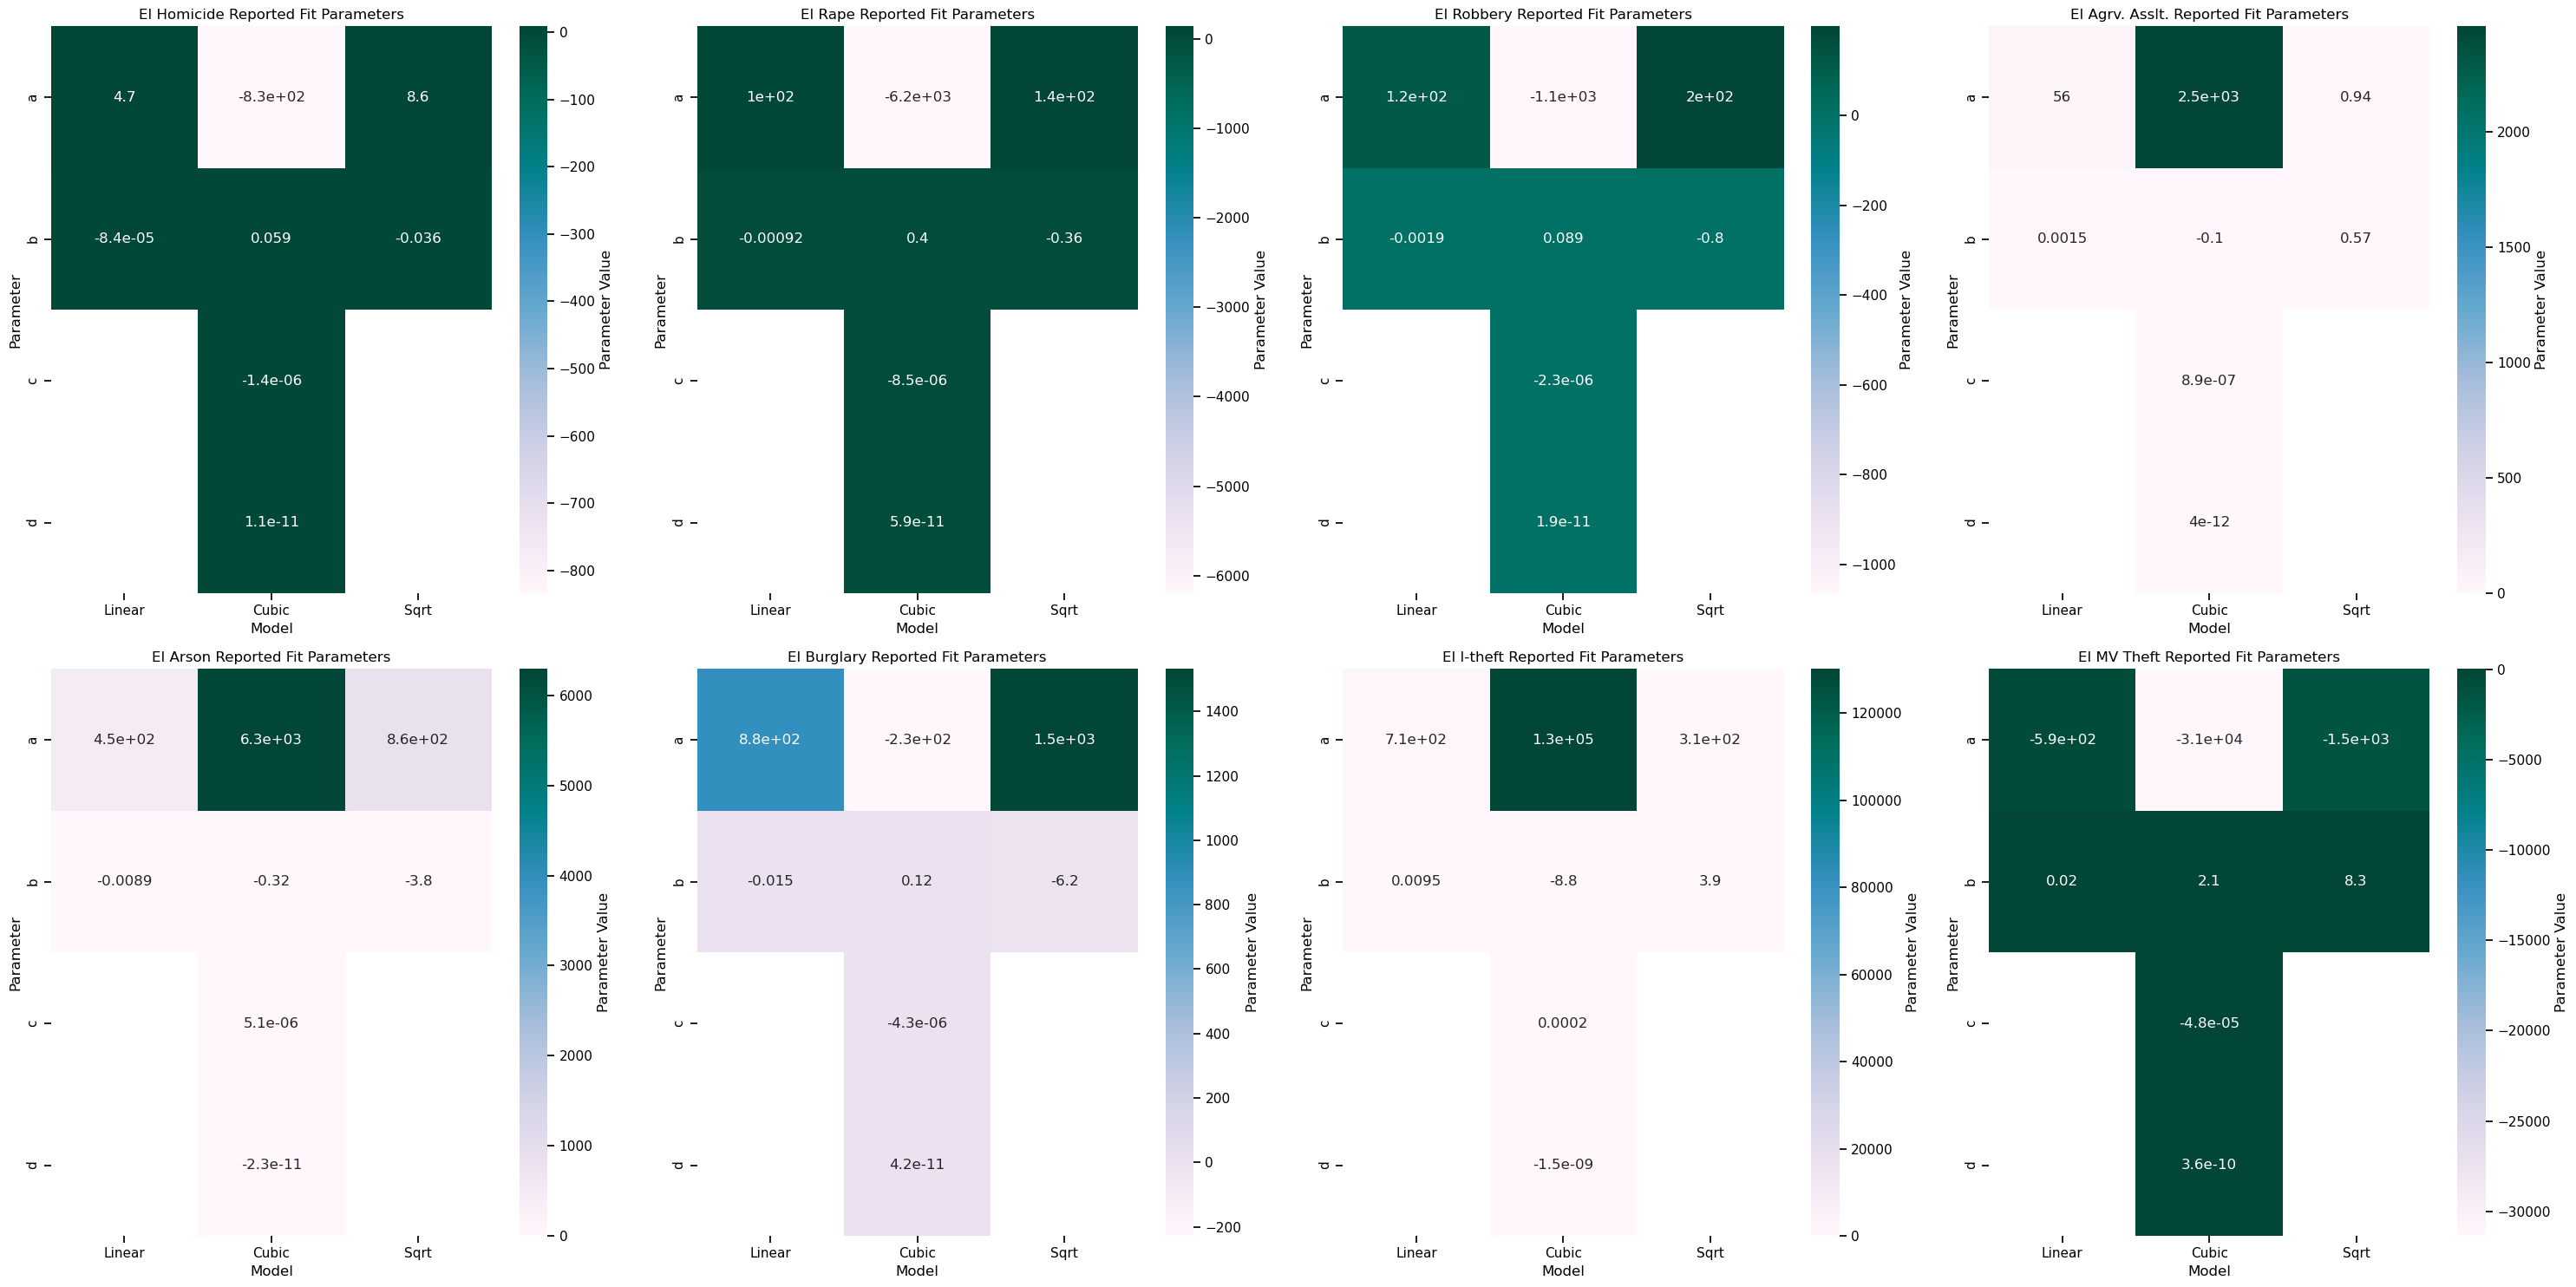

In [59]:
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(El_cr_i.columns) - 1:]:
    fig.delaxes(ax)

# Iterate over axes and crime columns
for ax, crime in zip(axs, El_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = El_cr_i['PCI'].values
        ydata = El_cr_i[crime].values

        linear_params, _ = curve_fit(linear_eq, xdata, ydata)
        cubic_params, _ = curve_fit(cubic_eq, xdata, ydata)
        sqrt_params, _ = curve_fit(sqrt_eq, xdata, ydata)


        # Create DataFrames from the parameters
        params_df = pd.DataFrame({
            'Linear': np.append(linear_params, [np.nan, np.nan]), # Append NaN for the missing cubic parameter in the linear model for alignment
            'Cubic': cubic_params,
            'Sqrt': np.append(sqrt_params, [np.nan, np.nan]) # Append NaN for the missing cubic parameter in the sqrt model for alignment
        }, index=['a', 'b', 'c', 'd'])

        # Adjusting the DataFrame for better readability
        params_df.index.name = 'Parameter'
        params_df.columns.name = 'Model'

        # Plotting the heatmap
        sns.heatmap(params_df, annot=True, cmap='PuBuGn', ax=ax, cbar_kws={'label': 'Parameter Value'})
        ax.set_title(f'{crime} Fit Parameters')

plt.tight_layout()
plt.show()

The parameters correlation coefficients are displayed above showing how the plotted crime rates correlate to income within East Lansing over an 11 year period. Violent crime seems to be the most correlated within the models, as Aggravated Assualt and Motor Vehicle Theft seem to be outliers.

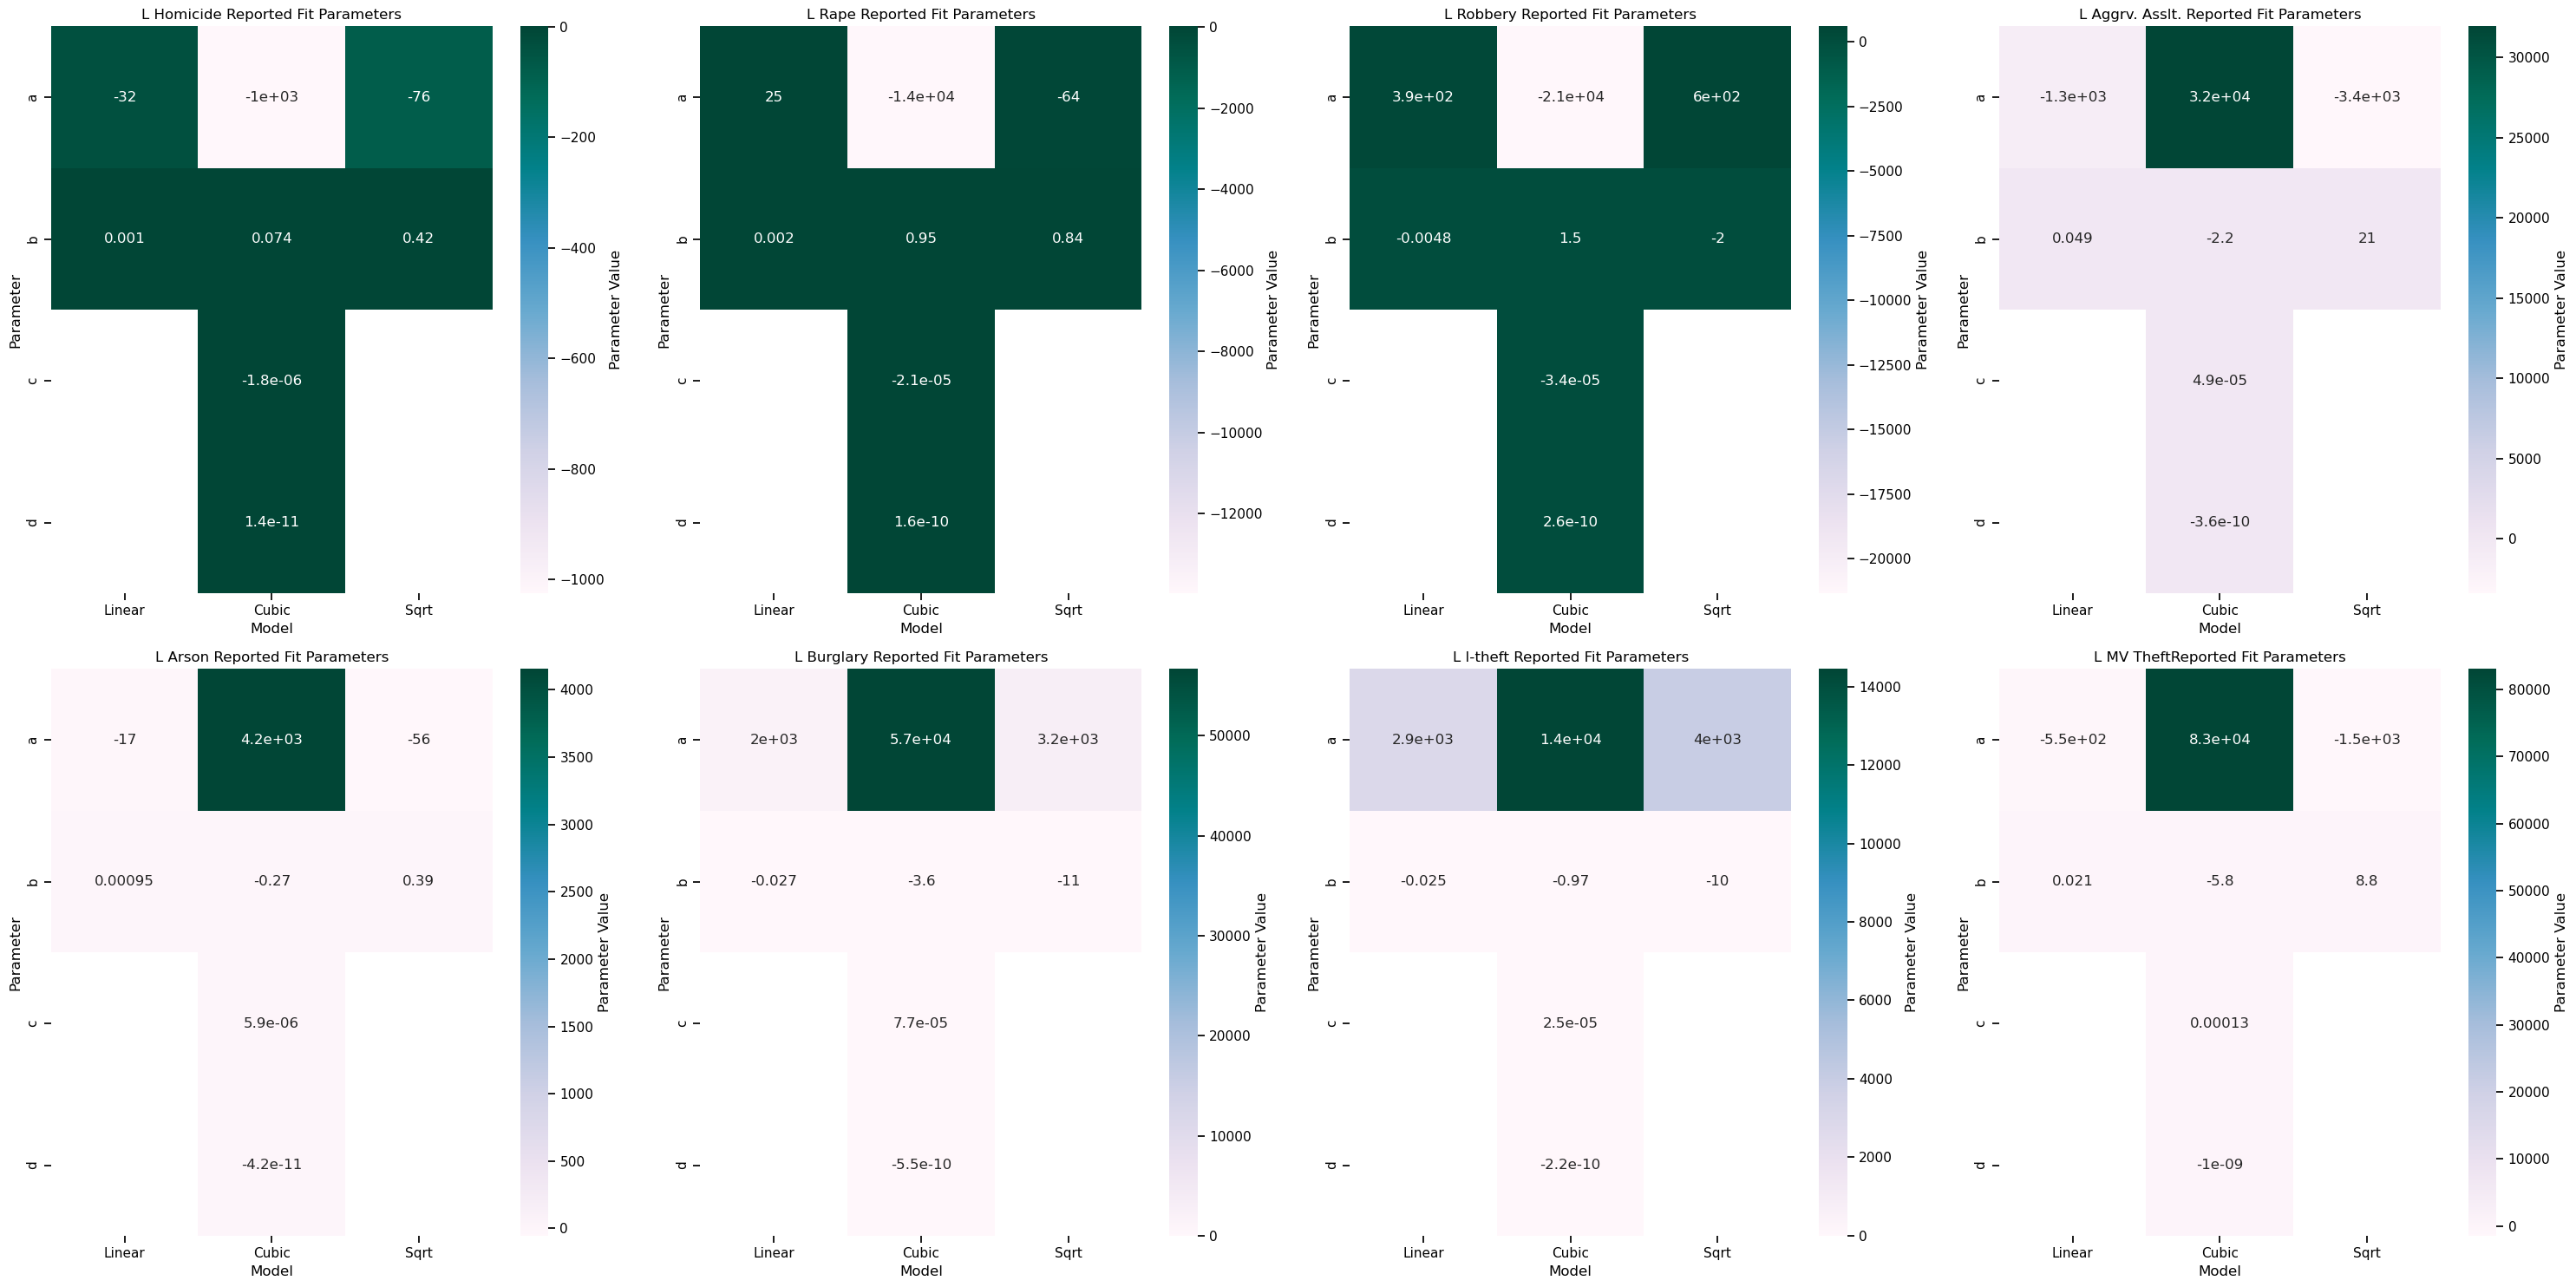

In [60]:
fig, axs = plt.subplots(2, 4, figsize=(30, 15))
axs = axs.flatten()

# Remove extra subplots
for ax in axs[len(L_cr_i.columns) - 1:]:
    fig.delaxes(ax)

# Iterate over axes and crime columns
for ax, crime in zip(axs, L_cr_i.columns):
    if crime != 'Year' and crime != 'PCI':
        xdata = L_cr_i['PCI'].values
        ydata = L_cr_i[crime].values

        linear_params, _ = curve_fit(linear_eq, xdata, ydata)
        cubic_params, _ = curve_fit(cubic_eq, xdata, ydata)
        sqrt_params, _ = curve_fit(sqrt_eq, xdata, ydata)


        # Create DataFrames from the parameters
        params_df = pd.DataFrame({
            'Linear': np.append(linear_params, [np.nan, np.nan]), # Append NaN for the missing cubic parameter in the linear model for alignment
            'Cubic': cubic_params,
            'Sqrt': np.append(sqrt_params, [np.nan, np.nan]) # Append NaN for the missing cubic parameter in the sqrt model for alignment
        }, index=['a', 'b', 'c', 'd'])

        # Adjusting the DataFrame for better readability
        params_df.index.name = 'Parameter'
        params_df.columns.name = 'Model'

        # Plotting the heatmap
        sns.heatmap(params_df, annot=True, cmap='PuBuGn', ax=ax, cbar_kws={'label': 'Parameter Value'})
        ax.set_title(f'{crime} Fit Parameters')

plt.tight_layout()
plt.show()


The correlation of the parameters and the best fit models can be seen above for Lansing in regard to the respective crime rate and income. The model shows a similar pattern to that of East Lansing with violent crime being the most correlated to income. Aggravated assault is also an outlier within the violent crime category as the crime is not correlated with income. Property crime does not show a correlation to income either within this neighborhood as expected from earlier data.

## Synthesis and Discussion

Performing data analysis on crime across Lansing-East Lansing it was clear that violent crime is the most correlated to income within the city. Although aggravated assault(a crime under the classification of violent crime) was a clear outlier within both neighborhoods showing no correlation to income. East Lansing however did have a second outlier within the property crime category as motor vehicle theft did seem to have a correlation to income, one factor that may play a role in this could be due to East Lansing being a college town causing criminals to target a demographic. The results can not be assumed for every city as there are many different factors of causation, this analysis did not explore causation rather correlation as there was insufficent data. 

The topic of crime and income poses many limitations to the analysis with inexact data regarding population and income. The income available for East Lansing was not independent as the data was also grouped with Lansing. Population data was also another obstacle I ran into as the most data available are estimates and inconsistant on a yearly basis, therefore I had to calculate population estimates myself. In order to be as accurate as possible only government data available was used. In the future I would spend more time gathering more data so the analysis could be explored further, possibly finding some factors of causation or more in depth and accurate results.

## References

[1] “Crime Data Explorer.” Cde.Ucr.Cjis.Gov, cde.ucr.cjis.gov/LATEST/webapp/#/pages/explorer/crime/crime-trend. 

[2] U.S. Census Bureau Quickfacts: Lansing City, Michigan; Michigan, www.census.gov/quickfacts/fact/table/lansingcitymichigan,MI/PST045222. 